# Prueba Geometría - Activimetros


In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Paquete de tiempo
import datetime
from datetime import time
from datetime import timedelta

%matplotlib inline

#Para cargar los datos

##############################################
######  MEDICINA NUCLEAR y RADIOFARMACIA #####
##############################################

###Datos 11 de Diciembre 2020
data = pd.read_csv('ActGeometria.txt', delim_whitespace =True)


#para ver los primeros datos
data.head()

,RN,Activ,Contenedor,Capacidad,Volumen,Hora,Mean,STD
0,I,MECMUR,Vial,15,1.5,17/12/2020T11:03,0.5672,0.0012
1,I,MECMUR,Vial,15,1.0,17/12/2020T11:08,0.3416,0.0012
2,I,MECMUR,Vial,15,0.5,17/12/2020T11:00,0.2140,0.0004
3,I,MECMUR,JeringaR,10,5.0,17/12/2020T11:23,2.7200,0.0082
4,Tc,25PET,Jeringa,1,0.1,11/12/2020T13:44,0.3550,0.0007


In [263]:
#data

In [264]:
#data.describe()
### Half Life Fuentes- Isotope Browser IAEA

##############################
########   Tc-99m  ###########
### half life [minutos]
HLTc= 6.0072*60
### half life [s]
##HLTcbq= 
### Lambda
LambdaTc= np.log(2)/HLTc
### Lambda [1/s]
##Lambdacobq= np.log(2)/HLTcbq

##############################
########   I-131  ###########
### half life [minutos]
HLI= 8.0252*86400
LambdaI= np.log(2)/HLI

##############################
########   Lu-177  ###########
### half life [minutos]
HLLu= 6.6443*86400
LambdaLu= np.log(2)/HLLu

# CV
#### Variabilidad valores medidos repetidos

In [265]:
data['Var']=(data['STD']*100)/data['Mean']

In [266]:
#data[data['RN']!='Lu']
#data[data['RN']!='Lu']['Var'].describe()
#data[data['Geop']=='Lu Vial'].describe()

#### Desviación estándar del promedio-SDOM

In [267]:
data['SDOM']=2*(data['STD']/np.sqrt(10))

#### Porcentaje de llenado del contenedor

In [268]:
data['porvol']=(data['Volumen']*100)/data['Capacidad']

#### Especificar Geometría

In [269]:
se = pd.Series(data['Contenedor']+', ' + data['Capacidad'].astype(str))
data['Geo'] = se.values

In [270]:
sa = pd.Series(data['RN']+ ' '+ data['Contenedor'] )
data['Geop'] = sa.values

In [203]:
#data

In [204]:
##lista de tipos de datos por cada columna
data.dtypes

RN             object
Activ          object
Contenedor     object
Capacidad       int64
Volumen       float64
Hora           object
Mean          float64
STD           float64
Var           float64
SDOM          float64
porvol        float64
Geo            object
Geop           object
dtype: object

In [271]:
import seaborn as sns

#### Estabilidad de la Medición

In [272]:
data['Geo'].value_counts()

Vial, 15        27
JeringaR, 10    13
Jeringa, 1      12
Jeringa, 3      12
Vial, 1         10
Jeringa, 50      8
Name: Geo, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

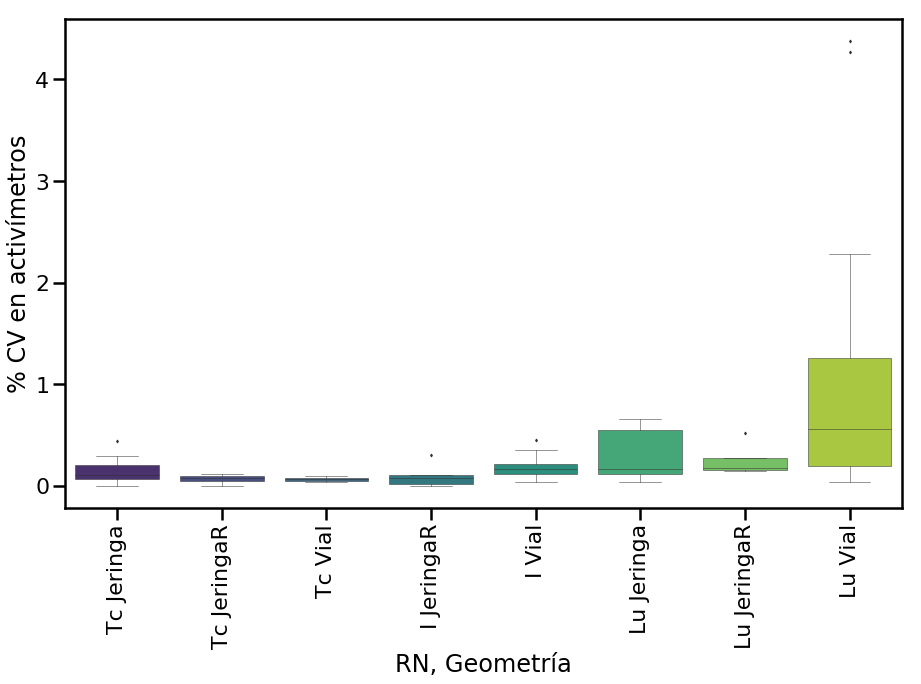

In [41]:
sns.set_context('poster')
plt.figure(figsize=(15,9))
sns.boxplot(x="Geop", y="Var", data=data,
              linewidth = 0.5,
              palette='viridis',
              fliersize=2,
              order=['Tc Jeringa','Tc JeringaR','Tc Vial','I JeringaR','I Vial','Lu Jeringa','Lu JeringaR','Lu Vial'])
#plt.setp(h.artists, edgecolor = 'darkgray')
#plt.setp(h.lines, color='darkgray')
plt.ylabel('% CV en activímetros')
plt.xlabel("RN, Geometría")
plt.xticks(rotation=90)
#plt.savefig('COVRN.pdf',bbox_inches = "tight")

In [273]:
#listaRF= ((data['RN']=='Tc') | (data['RN']=='I'))
#listaRF=data['RN']=='Lu'
listaRF=data['RN']=='I'
data = data[listaRF]

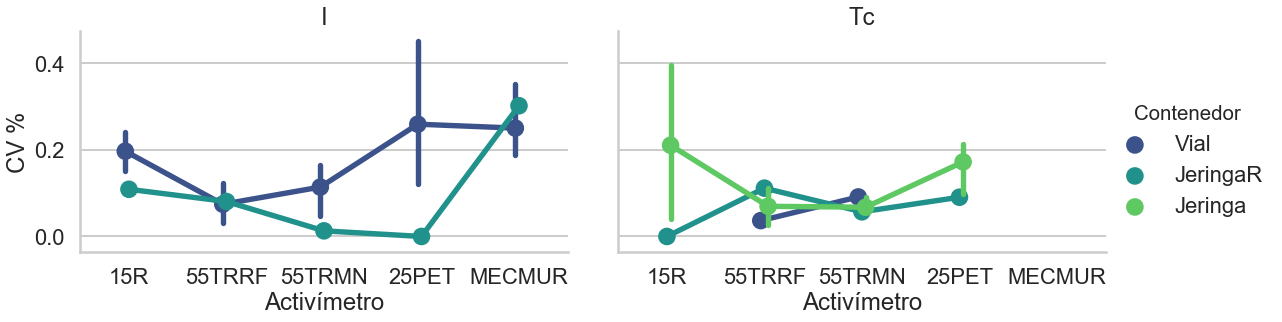

In [43]:
sns.set_context('poster')
sns.set_style('whitegrid')
g=sns.catplot(x="Activ", y="Var", hue="Contenedor", 
              kind="point", data=data, col="RN",
              aspect=1.6,ci=100,
              order=['15R','55TRRF','55TRMN','25PET','MECMUR'],
              palette='viridis',dodge=True) 

#hue_order=['Jeringa','JeringaR','Vial'],
#,'MECMUR'],
#col_order=['Tc','I'],
#g=sns.catplot(x="Activ", y="Var", hue="Contenedor", 
              #kind="point", data=data, col="RN",
              #height=6, aspect=1.6,ci=100,
              #order=['55TRMN','25PET','15R','55TRRF'],
              #hue_order=['Jeringa','JeringaR','Vial'],palette='viridis',dodge=True)  

g.set_titles(col_template="{col_name}")
g.set_axis_labels("Activímetro", "CV %")
#plt.savefig('COVActLu.pdf')

Text(0.5,0,'Contenedor, Capacidad')

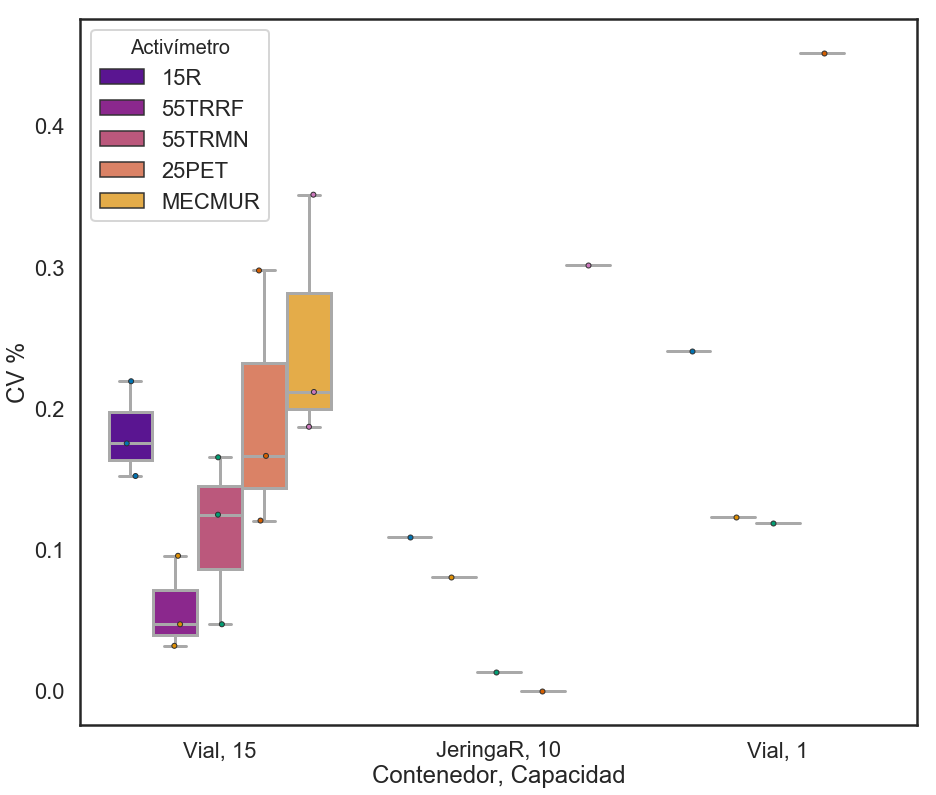

In [164]:
sns.set_context('poster')
sns.set_style('white')

plt.figure(figsize=(15,13))
hue_order = ['15R', '55TRRF', '55TRMN','25PET','MECMUR']
ax=sns.boxplot(x="Geo", y="Var",hue="Activ",data=data[data['RN']=='I'],palette='plasma',hue_order=hue_order)
ax=sns.stripplot(x="Geo", y="Var",hue="Activ",data=data[data['RN']=='I'],
                 palette="colorblind",dodge=True,jitter=True,linewidth=1,
                 edgecolor='gray',hue_order=hue_order)
plt.setp(ax.artists, edgecolor = 'darkgray')
plt.setp(ax.lines, color='darkgray')
# get legend information from the plot object
handles, labels = ax.get_legend_handles_labels()
# specify just one legend
l = plt.legend(handles[0:5], labels[0:5],title='Activímetro')
#l = plt.legend(handles[0:4], labels[0:4],title='Contenedor, Capacidad')
plt.setp(l.get_title(),fontsize='small')

#plt.plot((0,20),(0.5,0.5),':r',linewidth=1.5)
plt.ylabel('CV %')
plt.xlabel('Contenedor, Capacidad')
#plt.xlabel(r'Activímetro')
#plt.legend(title='Contenedor, Capacidad',loc='center right')
#plt.title('Dosis efectiva anual en Manos-Colectiva')
#plt.savefig('CVgeoactivI.pdf')

Text(0.5,0,'Contenedor, Capacidad')

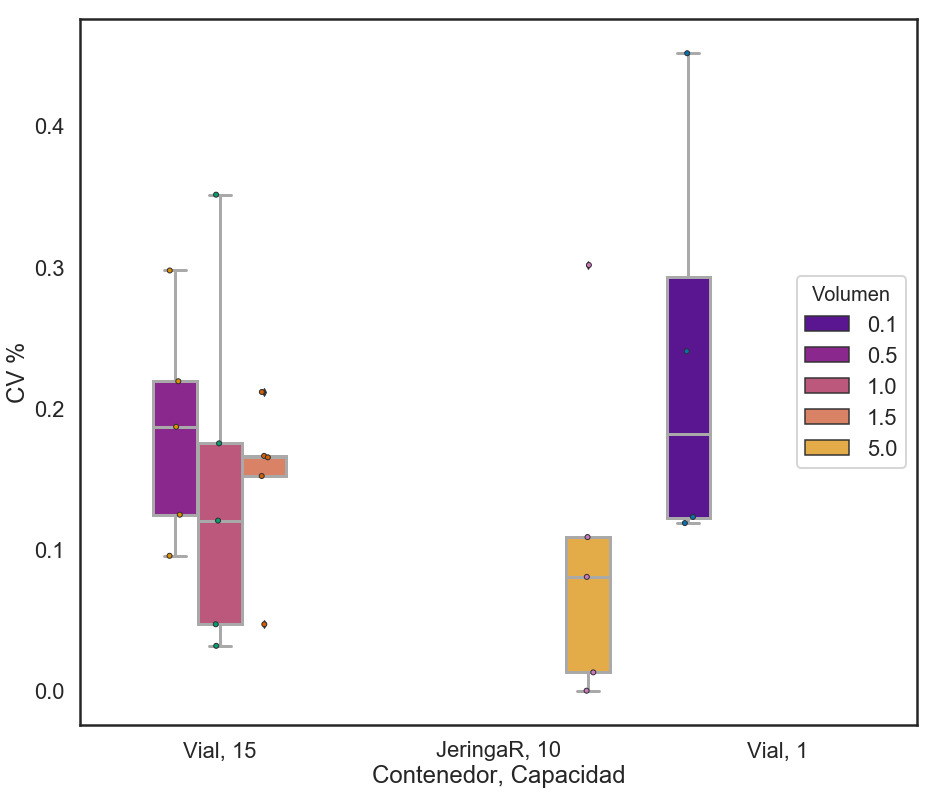

In [165]:
sns.set_context('poster')


plt.figure(figsize=(15,13))
ax=sns.boxplot(x="Geo", y="Var",hue="Volumen",data=data[data['RN']=='I'],palette='plasma')
ax=sns.stripplot(x="Geo", y="Var",hue="Volumen",data=data[data['RN']=='I'],
                 palette="colorblind",dodge=True,jitter=True,linewidth=1,
                 edgecolor='gray')
plt.setp(ax.artists, edgecolor = 'darkgray')
plt.setp(ax.lines, color='darkgray')
# get legend information from the plot object
handles, labels = ax.get_legend_handles_labels()
# specify just one legend
l = plt.legend(handles[0:5], labels[0:5],title='Volumen', loc='center right')
#l = plt.legend(handles[0:4], labels[0:4],title='Contenedor, Capacidad')
plt.setp(l.get_title(),fontsize='small')


#plt.plot((0,20),(0.5,0.5),':r',linewidth=1.5)
plt.ylabel('CV %')
plt.xlabel('Contenedor, Capacidad')
#plt.savefig('CVgeovolI.pdf')

Text(0.5,0,'Activímetro')

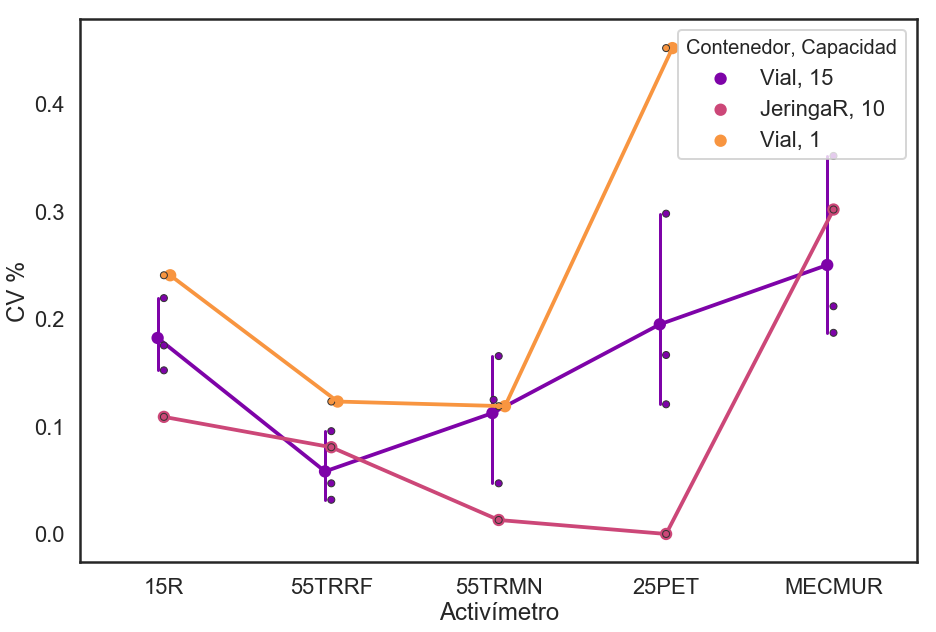

In [166]:
sns.set_context('poster')

plt.figure(figsize=(15,10))



g=sns.pointplot(x="Activ", y="Var",hue="Geo",data=data[data['RN']=='I'],palette="plasma",
                dodge=True,join=True,scale=0.7,errwidth=3,order = ['15R', '55TRRF', '55TRMN','25PET','MECMUR'])
g=sns.swarmplot(x="Activ", y="Var",hue="Geo",data=data[data['RN']=='I'],palette="plasma",
                dodge=False,linewidth=1,edgecolor='gray',size=7,order = ['15R', '55TRRF', '55TRMN','25PET','MECMUR'])
# get legend information from the plot object
handles, labels = g.get_legend_handles_labels()
# specify just one legend
l = plt.legend(handles[0:3], labels[0:3],title='Contenedor, Capacidad', loc='upper right')
#l = plt.legend(handles[0:4], labels[0:4],title='Contenedor, Capacidad')
plt.setp(l.get_title(),fontsize='small')

#plt.plot((0,100),(0.5,0.5),':r',linewidth=1.5)
plt.ylabel('CV %')
#plt.xlabel(r'% de llenado del Volumen total del contenedor')
plt.xlabel(r'Activímetro')
#plt.legend(title='Contenedor, Capacidad',loc='center right')
#plt.title('Dosis efectiva anual en Manos-Colectiva')
#plt.savefig('CVporvolactvI.pdf')

## Estabilidad de la medición x Radionucleido, Activimetro y Geometría

### Seleccionar Radionucleido

In [274]:
### Tecnecio
#lista= data['RN']=='Tc'
### Yodo
lista= data['RN']=='I'
### Lutecio
#lista= data['RN']=='Lu'

#### Filtrando por radionucleido
data = data[lista]

In [208]:
#sns.set_style('ticks')

### Elapsed Time 

In [275]:
################# Elapsed time ###############
#### Corrigiendo todas las medidas al tiempo de primera medición

### Tc-99m ###
#test='11/12/20 13:44'


####### I-131
test='11/12/20 14:09'


### Lu-177 ###
#test='11/12/20 13:57'

t=datetime.datetime.strptime(test,"%d/%m/%y %H:%M")
h=pd.to_datetime(data["Hora"],format="%d/%m/%YT%H:%M")

timeE=h-t
data['timeE']=(timeE.dt.seconds)/60

In [21]:
#data['timeE']

In [276]:
### Correcion de la actividad medida por Radionucleido

### Decay Factor-correction 
### Tc-99m ###
#DF=np.exp(LambdaTc*data["timeE"])

### I-131 ###
DF=np.exp(LambdaI*data["timeE"])


### Lu-177 ###
#DF=np.exp(LambdaLu*data["timeE"])

### Correción a Actividad Medida
data['CMean']=DF*data['Mean']


In [109]:
#data
#data.dtypes

#### Concentración de actividad

In [277]:
#### Concentración de actividad 
data['Concentra']=(data['CMean'])/data['Volumen']

In [278]:
#data['Concentra']

In [279]:
table1 = pd.pivot_table(data, values=['CMean','porvol'], index=['Activ','Contenedor', 'Geo','Volumen','SDOM'])
                    #aggfunc={'Var':max})

In [280]:
table1.reset_index(inplace=True)
#table1

In [28]:
#data['Geo'].value_counts()
#lista= ((table1['Contenedor']=='Jeringa') | (table1['Contenedor']=='JeringaR'))
#table1 = table1[lista]

Text(0,0.5,'Actividad medida [mCi]')

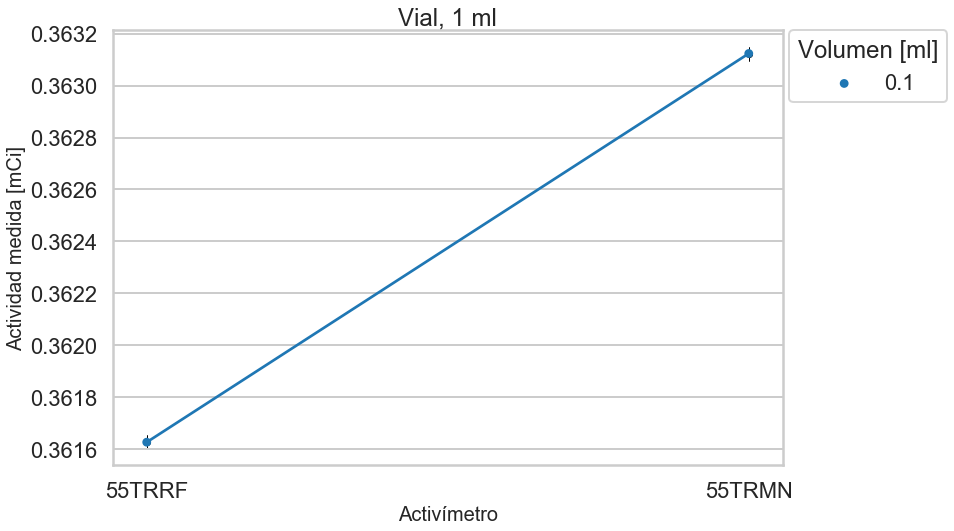

In [52]:
sns.set_context('poster')
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
ax=sns.pointplot(x="Activ", y="CMean", hue="Volumen",
                 kind="point", data=table1[table1['Geo']=='Vial, 1'],
                 aspect=1.6,ci=None,scale=0.5,
                 order=['15R','55TRRF','55TRMN','25PET','MECMUR'])
              #hue_order=['Jeringa','JeringaR','Vial'],palette='viridis',dodge=True)  
# Find the x, y coordinates for each point
x_coords=[]
y_coords=[]
for point_pair in ax.collections:
    for x,y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)
        
errors=table1[table1.Geo == 'Vial, 1']['SDOM']      
        
ax.errorbar(x_coords,y_coords,xerr=errors,fmt='.k',zorder=-1,capsize=7)
ax.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0,title='Volumen [ml]')
#ax.setp(l.get_title(),fontsize='small')
ax.set_title('Vial, 1 ml')
#ax.set(ylim=(0, 5.5), yticks=[1.0,2.0,3.0,4.0,5.0])
#yticks=[0.5,1.0,1.5,2.0,2.5])
ax.set_xlabel(r'Activímetro',fontsize=20)
ax.set_ylabel("Actividad medida [mCi]",fontsize=20)
#plt.savefig('Vial1I.pdf',bbox_inches = "tight")

In [177]:
#table1
#table1[table1.Geo == 'Jeringa, 1']
#table1[table1.Geo == 'Jeringa, 1']['SDOM'] 

/Users/Mila/anaconda/lib/python3.5/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


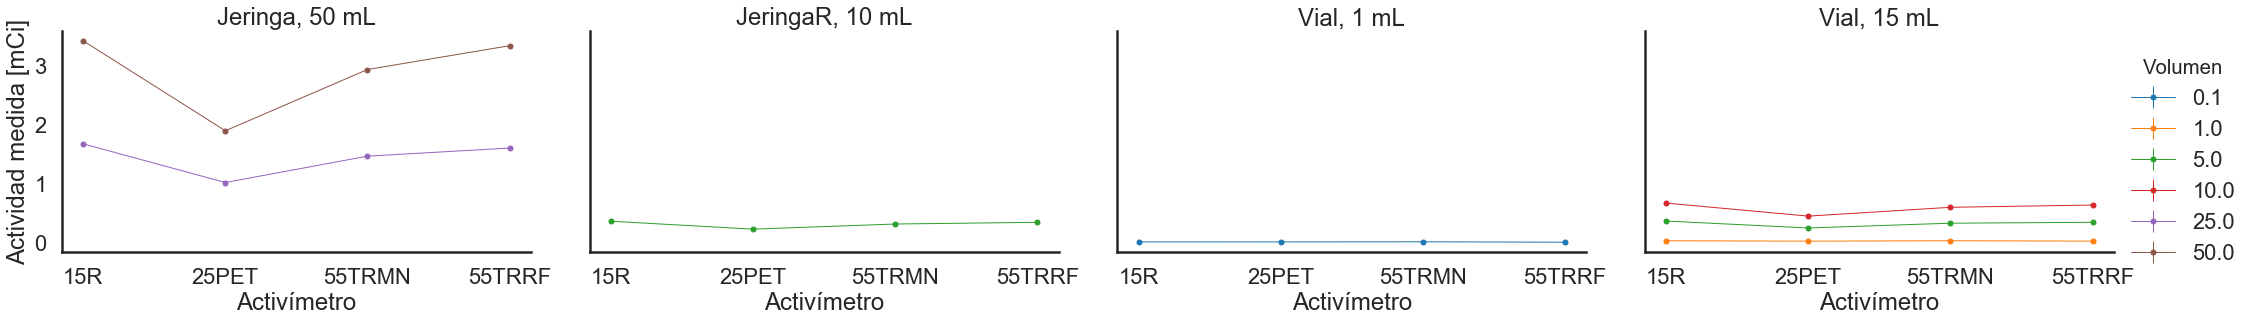

In [215]:
sns.set_context('poster')
sns.set_style('white')
g = sns.FacetGrid(table1,col='Geo',hue="Volumen",size=5,height=10,aspect=1.5)
                  #,palette='viridis')
#g = sns.FacetGrid(table1[table1['Geo']=='Jeringa, 1'],hue="Volumen", size=5,aspect=1.5)
g.map(plt.errorbar, "Activ","CMean","SDOM", marker="o",markersize=5,linewidth=1)
g.set_axis_labels("Activímetro", "Actividad medida [mCi]")
#g.set_title('Tecnecio')
g.set_titles(col_template="{col_name} mL")
#plt.subplots_adjust(top=0.8)
#g.fig.suptitle('Tecnecio 99m')
#g.fig.suptitle('Lutecio 177')
#g.set(ylim=(0, 5.5), yticks=[1, 2, 3, 4, 5])
g.add_legend()
#g.savefig('trazaAAvolI.pdf')

In [115]:
table1[(table1.Geo == 'Jeringa, 1') & (table1.Volumen == 1.0)]['CMean'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: CMean, dtype: float64

In [121]:
(table1[(table1.Geo == 'Vial, 15') & (table1.Volumen == 1.5)]['CMean'].std()*100)/table1[(table1.Geo == 'Vial, 15') & (table1.Volumen == 1.5)]['CMean'].mean()

33.00139085528265

In [116]:
(table1[table1.Geo == 'JeringaR, 10']['CMean'].std()*100)/table1[table1.Geo == 'JeringaR, 10']['CMean'].mean()

14.043225747978271

# Diferente Geometría, Mismo Volumen

In [216]:
###### Tc-99 m 
#link= ((data['Volumen']==0.1) | (data['Volumen']==0.3))
###### Lu-177
link= (data['Volumen']==5.0)

table = data[link]



In [217]:
#table

In [218]:
#### Tecnecio 99m
#Adgiv1=pd.Series(table[(table.Geo == 'Jeringa, 3') & (table.Volumen == 0.1)]['Activ'])
#Adgiv3=pd.Series(table[(table.Geo == 'Jeringa, 3') & (table.Volumen == 0.3)]['Activ'])
#### Lutecio 177
Adgiv5=pd.Series(table[(table.Geo == 'JeringaR, 10') & (table.Volumen == 5.0)]['Activ'])

In [219]:
off_list = []
for index, row in data.iterrows():
 ###### Tecnecio 99m   
    #if row['Volumen']==0.1:
        #c = Adgiv1[Adgiv1.values==row['Activ']].index.values.astype(int)[0]  
        #off_list.append(data.loc[c]['CMean']) 
    #if row['Volumen']==0.3:
        #c = Adgiv3[Adgiv3.values==row['Activ']].index.values.astype(int)[0]
    
 ###### Lutecio 177    
    if row['Volumen']==5.0:
        c = Adgiv5[Adgiv5.values==row['Activ']].index.values.astype(int)[0] 
    
    
#### Actividad de referencia
        off_list.append(data.loc[c]['CMean']) 

In [38]:
#off_list

In [220]:
table['kdgiv']=table['CMean']/off_list

/Users/Mila/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
#table

In [221]:
table['desvkdgiv']=np.absolute(table['kdgiv']-1)*100

/Users/Mila/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/Users/Mila/anaconda/lib/python3.5/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


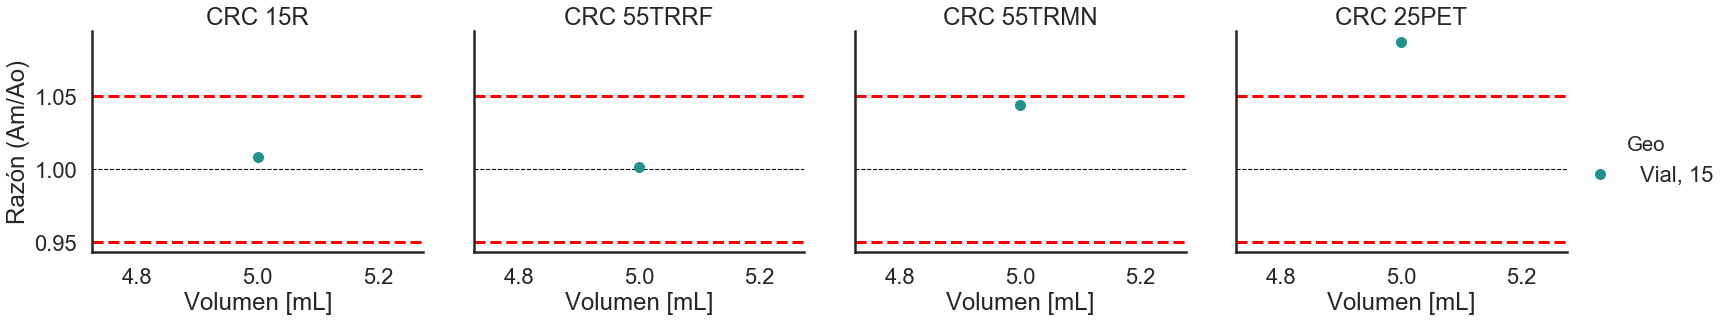

In [223]:
sns.set_context('poster')
sns.set_style('white')
g = sns.FacetGrid(table,col='Activ',hue="Geo",size=5,height=10,aspect=1.1,
                  palette='viridis',col_order=['15R','55TRRF','55TRMN','25PET'],
                  hue_order=['Vial, 15'])
g.map(plt.errorbar, "Volumen","kdgiv","SDOM", marker="o",markersize=10,linewidth=0)

def vertical_mean_line_survived(x, **kwargs):
    plt.axhline(1.05, linestyle = '--', color = 'r')
    plt.axhline(0.95, linestyle = '--', color = 'r')
    plt.axhline(1.00, linestyle = '--', color = 'k',linewidth=1.1)

g.map(vertical_mean_line_survived, 'Volumen') 
g.set_axis_labels("Volumen [mL]", "Razón (Am/Ao)")
#g.set_title('Tecnecio')
g.set_titles(col_template="CRC {col_name}")
g.add_legend()
#plt.savefig('kdgivLu.pdf')

In [226]:
table

,RN,Activ,Contenedor,Capacidad,Volumen,Hora,Mean,STD,Var,SDOM,porvol,Geo,Geop,timeE,CMean,Concentra,kdgiv,desvkdgiv
16,Lu,25PET,JeringaR,10,5.0,11/12/2020T13:57,0.2300,0.0012,0.521739,0.000759,50.000000,"JeringaR, 10",Lu JeringaR,0.0,0.230000,0.046000,1.000000,0.000000
19,Lu,25PET,Vial,15,5.0,11/12/2020T14:01,0.2500,0.0013,0.520000,0.000822,33.333333,"Vial, 15",Lu Vial,4.0,0.250001,0.050000,1.086962,8.696177
30,Lu,15R,Vial,15,5.0,11/12/2020T15:42,0.3670,0.0010,0.272480,0.000632,33.333333,"Vial, 15",Lu Vial,105.0,0.367047,0.073409,1.008233,0.823324
34,Lu,15R,JeringaR,10,5.0,11/12/2020T15:49,0.3640,0.0007,0.192308,0.000443,50.000000,"JeringaR, 10",Lu JeringaR,112.0,0.364049,0.072810,1.000000,0.000000
50,Lu,55TRRF,Vial,15,5.0,11/12/2020T16:17,0.3461,0.0002,0.057787,0.000126,33.333333,"Vial, 15",Lu Vial,140.0,0.346159,0.069232,1.001145,0.114498
53,Lu,55TRRF,JeringaR,10,5.0,11/12/2020T16:27,0.3457,0.0005,0.144634,0.000316,50.000000,"JeringaR, 10",Lu JeringaR,150.0,0.345763,0.069153,1.000000,0.000000
67,Lu,55TRMN,JeringaR,10,5.0,11/12/2020T14:37,0.3170,0.0005,0.157729,0.000316,50.000000,"JeringaR, 10",Lu JeringaR,40.0,0.317015,0.063403,1.000000,0.000000
70,Lu,55TRMN,Vial,15,5.0,11/12/2020T14:42,0.3308,0.0002,0.060459,0.000126,33.333333,"Vial, 15",Lu Vial,45.0,0.330818,0.066164,1.043539,4.353942


/Users/Mila/anaconda/lib/python3.5/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


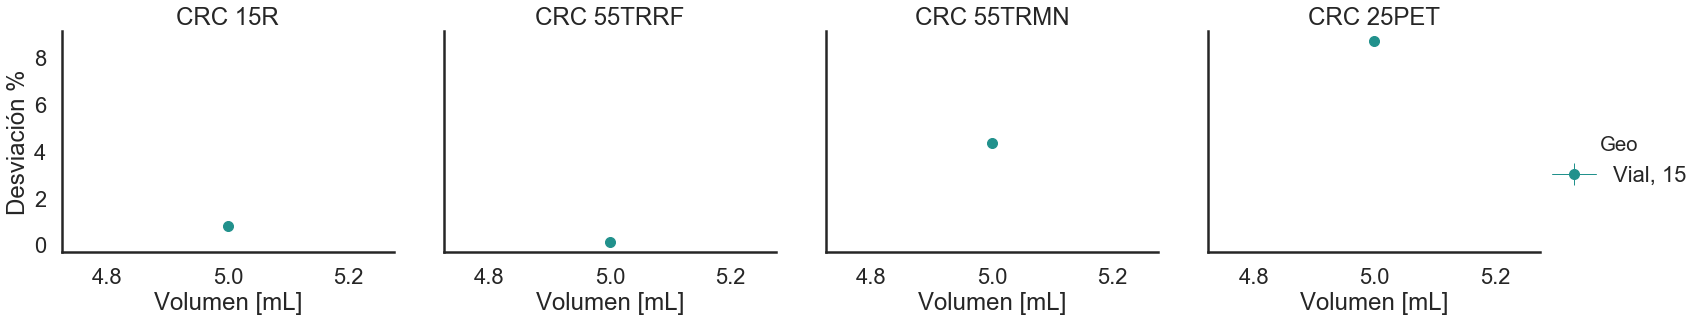

In [224]:
sns.set_context('poster')
sns.set_style('white')
g = sns.FacetGrid(table,col='Activ',hue="Geo",size=5,height=10,aspect=1.1,
                  palette='viridis',col_order=['15R','55TRRF','55TRMN','25PET'],
                  hue_order=['Vial, 15'])
g.map(plt.errorbar, "Volumen","desvkdgiv","SDOM", marker="o",markersize=10,linewidth=1)
g.set_axis_labels("Volumen [mL]", "Desviación %")
#g.set_title('Tecnecio')
g.set_titles(col_template="CRC {col_name}")

g.add_legend()
#g.savefig('desvkdgivLu.pdf')

In [60]:
#data

# Misma Geometría, Diferente Volumen

Text(0.5,0,'Volumen [ml]')

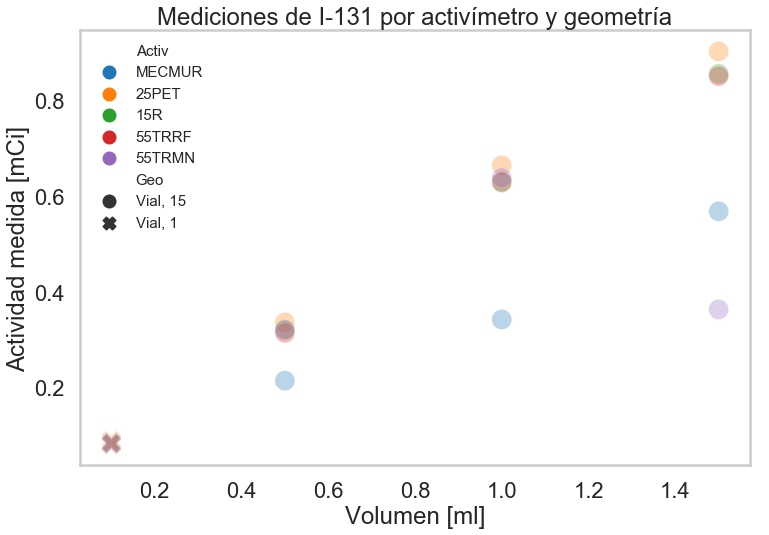

In [282]:
sns.set_style('whitegrid')
sns.set_context('poster')
plt.figure(figsize=(12,8))
#[(table.Geo == 'JeringaR, 10') & (table.Volumen == 5.0)]
### Tecnecio-99m
ax=sns.scatterplot(data=data[data['Contenedor']=='Vial'], x="Volumen", y="CMean", hue="Activ",style="Geo",s=400,alpha=0.3)
### Lutecio-177
#ax=sns.scatterplot(data=data[((data['Geo']=='Jeringa, 50') | (data['Geo']=='Vial, 15'))], x="Volumen", y="Concentra", hue="Activ",style="Geo",s=400,alpha=0.3)
#ax=sns.scatterplot(data=data, x="Volumen", y="CMean", hue="Activ",style="Geo",s=400,alpha=0.3)



# get legend information from the plot object
handles, labels = ax.get_legend_handles_labels()
# specify just one legend
l = plt.legend(handles[0:11], labels[0:11],frameon=False,fontsize=15)
#plt.setp(l.get_title(),fontsize='x-small')

#plt.ylabel('Actividad/Volumen [mCi/ml]')
plt.ylabel('Actividad medida [mCi]')
#plt.ylabel('A$_m$/A$_{ref}$')
plt.grid(False)
plt.title('Mediciones de I-131 por activímetro y geometría')
#plt.title('Tc-99m Jeringas de 1 mL y 3 mL ')
#plt.title('Lu-177 Vial de 15 ml y Jeringa de 50 ml')
#plt.xlabel(r'% de llenado del Volumen total del contenedor')
plt.xlabel(r'Volumen [ml]')

#plt.savefig('IGG.pdf')

In [113]:
#data['Geo']

In [283]:
###### Tc-99 m 
#listado= ((data['Geo']=='Jeringa, 1') | (data['Geo']=='Jeringa, 3'))
###### Lu-177
#listado= ((data['Geo']=='Jeringa, 50') | (data['Geo']=='Vial, 15'))
###### I-131
listado= (data['Geo']=='Vial, 15')




table = data[listado]


In [284]:
len(table)


15

##### Seleccionando indices para el valor de referencia por volumen por activímetro por geometría

In [285]:
#### Tecnecio 99m
#AJ1=pd.Series(table[(table.Geo == 'Jeringa, 1') & (table.Volumen == 0.3)]['Activ'])
#AJ3=pd.Series(table[(table.Geo == 'Jeringa, 3') & (table.Volumen == 0.3)]['Activ'])

#### Lutecio 177
#AJ50=pd.Series(table[(table.Geo == 'Jeringa, 50') & (table.Volumen == 25)]['Activ'])
#AV15=pd.Series(table[(table.Geo == 'Vial, 15') & (table.Volumen == 10)]['Activ'])

#### Yodo 131
AV15=pd.Series(table[(table.Geo == 'Vial, 15') & (table.Volumen == 1.0)]['Activ'])

In [286]:
cutoff_list = []
#### Lutecio
volumen_list=[]

for index, row in data.iterrows():
 ###### Tecnecio 
    #if row['Geo']=='Jeringa, 1':
        #c = AJ1[AJ1.values==row['Activ']].index.values.astype(int)[0]  
        #cutoff_list.append(data.loc[c]['CMean']) 
    #if row['Geo']=='Jeringa, 3':
        #c = AJ3[AJ3.values==row['Activ']].index.values.astype(int)[0]
 ###### Lutecio
    #if row['Geo']=='Jeringa, 50':
        #c = AJ50[AJ50.values==row['Activ']].index.values.astype(int)[0]  
        #cutoff_list.append(data.loc[c]['CMean']) 
        #volumen_list.append(data.loc[c]['Volumen']) 
    #if row['Geo']=='Vial, 15':
        #c = AV15[AV15.values==row['Activ']].index.values.astype(int)[0]
        #volumen_list.append(data.loc[c]['Volumen']) 
 ###### Yodo
    if row['Geo']=='Jeringa, 50':
        c = AJ50[AJ50.values==row['Activ']].index.values.astype(int)[0]  
        cutoff_list.append(data.loc[c]['CMean']) 
        volumen_list.append(data.loc[c]['Volumen']) 
    if row['Geo']=='Vial, 15':
        c = AV15[AV15.values==row['Activ']].index.values.astype(int)[0]
        volumen_list.append(data.loc[c]['Volumen'])        
        
#### Actividad de referencia
        cutoff_list.append(data.loc[c]['CMean']) 

In [146]:
#volumen_list
#cutoff_list

In [287]:
#### Razon k: Misma(=) geometría, Diferente volumen
#k_igdv=
#### Tecnecio 99m
#### No funcionó en absoluto
#table['kigdv']=(table['CMean']*0.3)/(cutoff_list*table['Volumen'])
#### Yodo 131
##### Yodo si parece funcionar mucho mejor 
table['kigdv']=(table['CMean']*1.0)/(cutoff_list*table['Volumen'])
#### Lutecio 177
#table['kigdv']=(table['CMean']*volumen_list)/(cutoff_list*table['Volumen'])
#### Lutecio 177
#table['kigdv']=(table['CMean']*volumen_list)/(cutoff_list*table['Volumen'])


/Users/Mila/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [288]:
#table
table['desvkigdv']=np.absolute(table['kigdv']-1)*100

/Users/Mila/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [289]:
table['kigdv']

0     1.106942
1     1.000000
2     1.252917
11    0.905621
12    1.012047
13    1.000000
24    0.907641
25    1.000000
27    1.017253
42    1.000000
44    0.900542
46    0.997806
62    1.006425
64    0.379488
65    1.000000
Name: kigdv, dtype: float64

/Users/Mila/anaconda/lib/python3.5/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


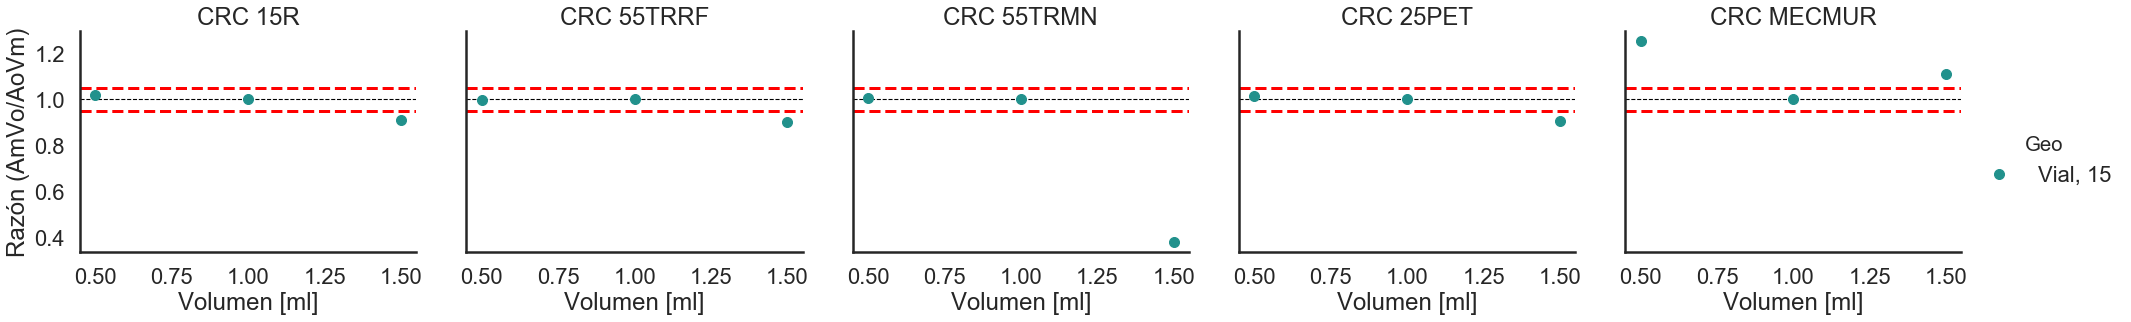

In [290]:
sns.set_context('poster')
sns.set_style('white')
g = sns.FacetGrid(table,col='Activ',hue="Geo",size=5,height=10,aspect=1.1,palette='viridis',col_order=['15R','55TRRF','55TRMN','25PET','MECMUR'])
g.map(plt.errorbar, "Volumen","kigdv","SDOM", marker="o",markersize=10,linewidth=0)

def vertical_mean_line_survived(x, **kwargs):
    plt.axhline(1.00, linestyle = '--', color = 'k',linewidth=1.1)
    plt.axhline(0.95, linestyle = '--', color = 'r')
    plt.axhline(1.05, linestyle = '--', color = 'r')
    
g.map(vertical_mean_line_survived, 'Volumen') 


#g.set(ylim=(0, 2.0))
g.set_axis_labels("Volumen [ml]", "Razón (AmVo/AoVm)")
g.set_titles(col_template="CRC {col_name}")

g.add_legend()
#g.savefig('kigdvI.pdf')

/Users/Mila/anaconda/lib/python3.5/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


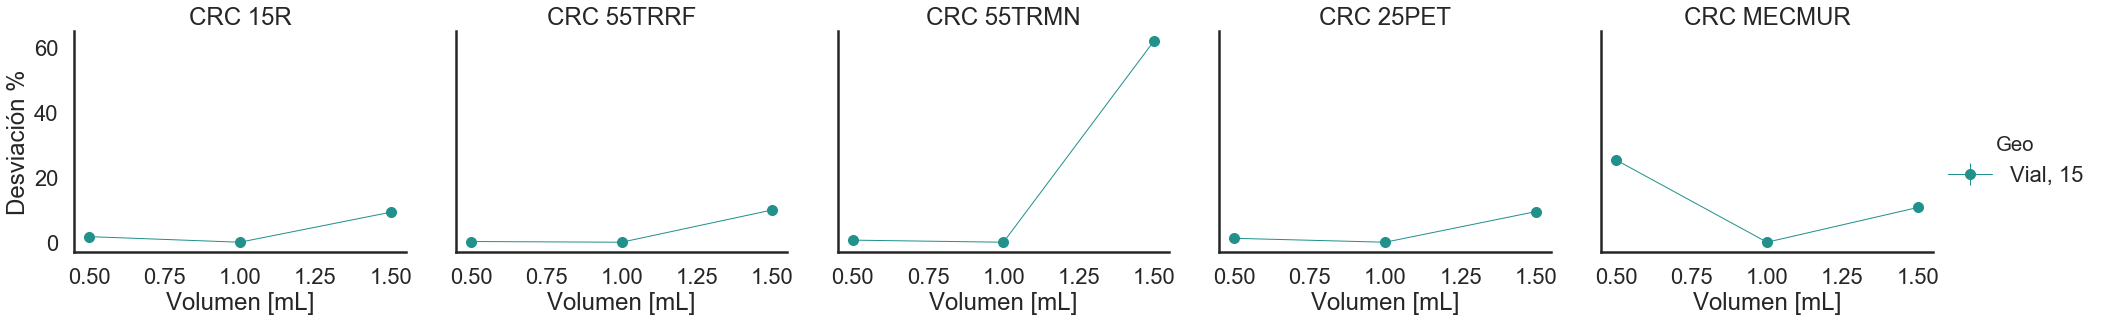

In [192]:
sns.set_context('poster')
sns.set_style('white')
g = sns.FacetGrid(table.sort_values(by=['Volumen']),col='Activ',hue="Geo",size=5,height=10,aspect=1.1,
                  palette='viridis',col_order=['15R','55TRRF','55TRMN','25PET','MECMUR'],
                  #hue_order=['Jeringa, 1','Jeringa, 3'])
                  #hue_order=['Vial, 15','Jeringa, 50'])
                  hue_order=['Vial, 15'])
g.map(plt.errorbar, "Volumen","desvkigdv","SDOM", marker="o",markersize=10,linewidth=1)
g.set_axis_labels("Volumen [mL]", "Desviación %")
#g.set_title('Tecnecio')
g.set_titles(col_template="CRC {col_name}")

g.add_legend()
g.savefig('desvkigdvI.pdf')

## Ajuste misma Geometria, Diferente volumen

In [291]:
##### Tc-99m
#listado= ((data['Geo']=='Jeringa, 1') | (data['Geo']=='Jeringa, 3'))
##### Lu-177
#listado= ((data['Geo']=='Jeringa, 50') | (data['Geo']=='Vial, 15'))
##### I-131
listado= (data['Geo']=='Vial, 15')


ajuste=data
ajuste=ajuste[listado]

In [292]:
from sklearn.linear_model import LinearRegression
#Create the linear regression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [293]:
#### Funcion para Ajustes 
def ols_res(ajuste,xcols,ycol):
    Y = ajuste['CMean']
    X = ajuste[['Volumen']]
    lm.fit(X,Y)
    slope=lm.coef_
    intercept=lm.intercept_
    return pd.Series({'slope':slope, 'intercept': intercept})

In [294]:
#### Llamadas de la funcion para obtener datos de ajuste lineal: pendiente e intercepto
#### Tc-99m
#res1=ajuste[ajuste.Capacidad==1].groupby('Activ').apply(ols_res, xcols='Volumen', 
                                                    #ycol='CMean')
#res3=ajuste[ajuste.Capacidad==3].groupby('Activ').apply(ols_res, xcols='Volumen',
                                                    #ycol='CMean')
#### Lu-177
#res50=ajuste[ajuste.Capacidad==50].groupby('Activ').apply(ols_res, xcols='Volumen',ycol='CMean')
#res15=ajuste[ajuste.Capacidad==15].groupby('Activ').apply(ols_res, xcols='Volumen',ycol='CMean')

#### I-131
res15=ajuste[ajuste.Capacidad==15].groupby('Activ').apply(ols_res, xcols='Volumen',ycol='CMean')

In [295]:
list_Aref = []
for index, row in ajuste.iterrows():
    #### Tecnecio 99m
    #if row['Geo']=='Jeringa, 1':
        #c=(res1[res1.index==row['Activ']]['slope'].values.astype(float)[0]*row['Volumen'])+(res1[res1.index==row['Activ']]['intercept'].values.astype(float)[0])
        #list_Aref.append(c)
    #if row['Geo']=='Jeringa, 3':
        #c=(res3[res3.index==row['Activ']]['slope'].values.astype(float)[0]*row['Volumen'])+(res3[res3.index==row['Activ']]['intercept'].values.astype(float)[0])
        #list_Aref.append(c)
    ##### Lutecio 177
    #if row['Geo']=='Jeringa, 50':
        #c=(res50[res50.index==row['Activ']]['slope'].values.astype(float)[0]*row['Volumen'])+(res50[res50.index==row['Activ']]['intercept'].values.astype(float)[0])
        #list_Aref.append(c)
    #if row['Geo']=='Vial, 15':
        #c=(res15[res15.index==row['Activ']]['slope'].values.astype(float)[0]*row['Volumen'])+(res15[res15.index==row['Activ']]['intercept'].values.astype(float)[0])
        #list_Aref.append(c)
    ##### Yodo 131    
    if row['Geo']=='Vial, 15':
        c=(res15[res15.index==row['Activ']]['slope'].values.astype(float)[0]*row['Volumen'])+(res15[res15.index==row['Activ']]['intercept'].values.astype(float)[0])
        list_Aref.append(c)  

In [296]:
ajuste['ME']=list_Aref

/Users/Mila/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [297]:
ajuste['R']=ajuste['CMean']/list_Aref
### Desviacion 
ajuste['desv']=np.absolute(ajuste['R']-1)*100
#ajuste

/Users/Mila/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Mila/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [298]:
ajuste

,RN,Activ,Contenedor,Capacidad,Volumen,Hora,Mean,STD,Var,SDOM,porvol,Geo,Geop,timeE,CMean,Concentra,ME,R,desv
0,I,MECMUR,Vial,15,1.5,17/12/2020T11:03,0.5672,0.0012,0.211566,0.000759,10.000000,"Vial, 15",I Vial,1254.0,0.567911,0.378608,0.551558,1.029649,2.964898
1,I,MECMUR,Vial,15,1.0,17/12/2020T11:08,0.3416,0.0012,0.351288,0.000759,6.666667,"Vial, 15",I Vial,1259.0,0.342030,0.342030,0.374736,0.912722,8.727810
2,I,MECMUR,Vial,15,0.5,17/12/2020T11:00,0.2140,0.0004,0.186916,0.000253,3.333333,"Vial, 15",I Vial,1251.0,0.214268,0.428536,0.197915,1.082627,8.262726
11,I,25PET,Vial,15,1.5,11/12/2020T14:09,0.9020,0.0015,0.166297,0.000949,10.000000,"Vial, 15",I Vial,0.0,0.902000,0.601333,0.917000,0.983642,1.635810
12,I,25PET,Vial,15,0.5,11/12/2020T14:10,0.3360,0.0010,0.297619,0.000632,3.333333,"Vial, 15",I Vial,1.0,0.336000,0.672001,0.351001,0.957264,4.273606
13,I,25PET,Vial,15,1.0,11/12/2020T14:11,0.6640,0.0008,0.120482,0.000506,6.666667,"Vial, 15",I Vial,2.0,0.664001,0.664001,0.634001,1.047320,4.731979
24,I,15R,Vial,15,1.5,11/12/2020T15:52,0.8550,0.0013,0.152047,0.000822,10.000000,"Vial, 15",I Vial,103.0,0.855088,0.570059,0.868687,0.984346,1.565442
25,I,15R,Vial,15,1.0,11/12/2020T15:54,0.6280,0.0011,0.175159,0.000696,6.666667,"Vial, 15",I Vial,105.0,0.628066,0.628066,0.600868,1.045264,4.526378
27,I,15R,Vial,15,0.5,11/12/2020T16:49,0.3194,0.0007,0.219161,0.000443,3.333333,"Vial, 15",I Vial,160.0,0.319451,0.638902,0.333050,0.959169,4.083108
42,I,55TRRF,Vial,15,1.0,11/12/2020T16:21,0.6294,0.0002,0.031776,0.000126,6.666667,"Vial, 15",I Vial,132.0,0.629483,0.629483,0.597949,1.052737,5.273656


/Users/Mila/anaconda/lib/python3.5/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


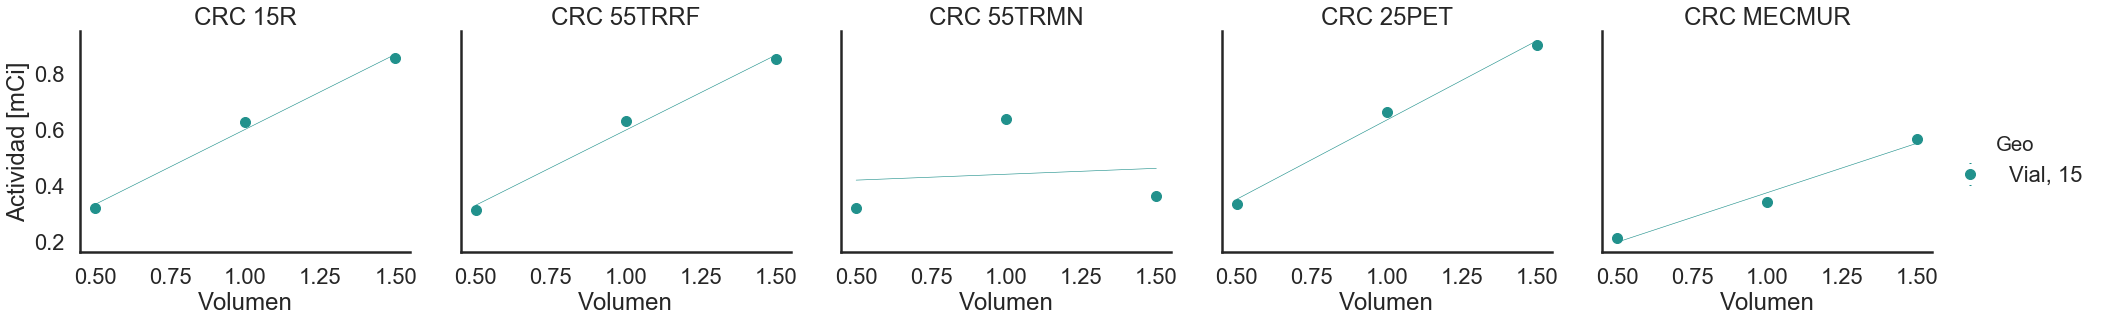

In [299]:
sns.set_context('poster')
sns.set_style('white')
g = sns.FacetGrid(ajuste.sort_values(by=['Volumen']),col='Activ',hue="Geo",size=5,height=10,aspect=1.1,
                  palette='viridis',col_order=['15R','55TRRF','55TRMN','25PET','MECMUR'])

g.map(plt.errorbar, "Volumen","CMean","SDOM", marker="o",markersize=10,capsize=1,linewidth=0)
g.map_dataframe(sns.lineplot, "Volumen","ME",markersize=10,linewidth=0.6)

    
#g.map(vertical_mean_line_survived, 'Volumen') 
g.set_axis_labels("Volumen", "Actividad [mCi]")
#g.set_title('Tecnecio')
#g.set(ylim=(0.93, 1.07))
g.set_titles(col_template="CRC {col_name}")
g.add_legend()
#g.savefig('ajusigdvI.pdf')

/Users/Mila/anaconda/lib/python3.5/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


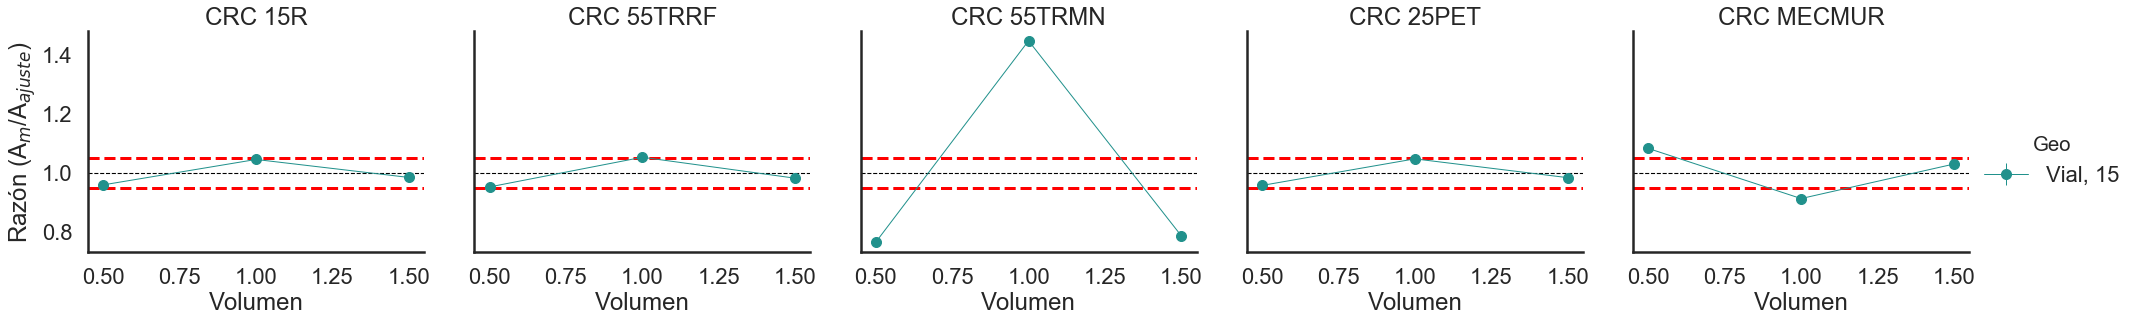

In [201]:
sns.set_context('poster')
sns.set_style('white')
g = sns.FacetGrid(ajuste.sort_values(by=['Volumen']),col='Activ',hue="Geo",size=5,height=10,aspect=1.1,
                  palette='viridis',col_order=['15R','55TRRF','55TRMN','25PET','MECMUR'])
#
g.map(plt.errorbar, "Volumen","R","SDOM", marker="o",markersize=10,linewidth=1,zorder=2)

def vertical_mean_line_survived(x, **kwargs):
    plt.axhline(1.05, linestyle = '--', color = 'r')
    plt.axhline(0.95, linestyle = '--', color = 'r')
    plt.axhline(1.00, linestyle = '--', color = 'k',linewidth=1.1)
    
g.map(vertical_mean_line_survived, 'Volumen') 
g.set_axis_labels("Volumen", "Razón (A$_m$/A$_{ajuste}$)")
#g.set_title('Tecnecio')
#g.set(ylim=(0.93, 1.07))
g.set_titles(col_template="CRC {col_name}")
g.add_legend()
g.savefig('razigdvI.pdf')

/Users/Mila/anaconda/lib/python3.5/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


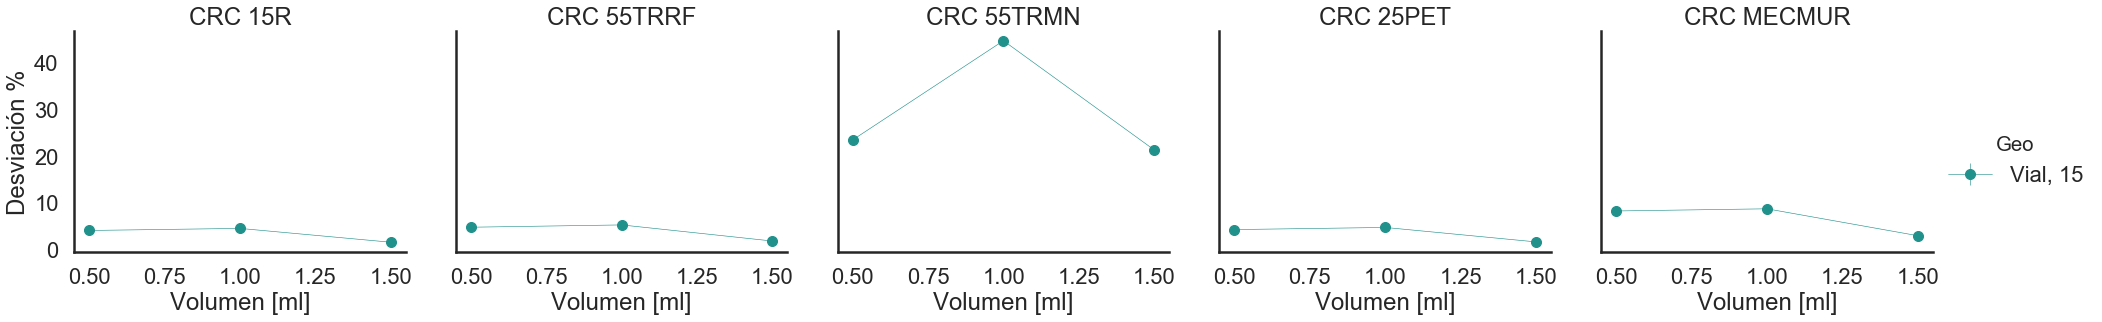

In [203]:
sns.set_context('poster')
sns.set_style('white')
g = sns.FacetGrid(ajuste.sort_values(by=['Volumen']),col='Activ',hue="Geo",size=5,height=10,aspect=1.1,
                  palette='viridis',col_order=['15R','55TRRF','55TRMN','25PET','MECMUR'])
g.map(plt.errorbar, "Volumen","desv","SDOM", marker="o",markersize=10,linewidth=0.6)
g.set_axis_labels("Volumen [ml]", "Desviación %")
#g.set_title('Tecnecio')
g.set_titles(col_template="CRC {col_name}")

g.add_legend()
g.savefig('desajuigdvI.pdf')

### Razon con actividad de referencia (convencional y en concentracion) 

In [300]:
###### Tc-99m, Lu-177, I-131
listref= (data['Contenedor']=='JeringaR')



table = data[listref]


Aref=pd.Series(table['Activ'])

#Aref.index.values
#Aref.values
Aref

3     MECMUR
15     25PET
23       15R
45    55TRRF
63    55TRMN
Name: Activ, dtype: object

In [301]:
#data
#tabaa

In [302]:
list_refcon = []
list_conref=[]
for index, row in data.iterrows():
    c = Aref[Aref.values==row['Activ']].index.values.astype(int)[0]
    #### Actividad de referencia
    list_refcon.append(data.loc[c]['CMean']) 
    list_conref.append(data.loc[c]['Concentra']) 

In [108]:
#list_conref
#data

In [303]:
###### RAZONES: Actividad medida y Actividad de Referencia (Jeringa de 10,Volumen 5 mL)
##### A_m/A_ref
data['R']=data['CMean']/list_refcon
##### Concentracon de actividad
#tabaa['Rcona']=(data['CMean']*5.0)/(list_refcon*data['Volumen'])
data['Rcona']=data['Concentra']/list_conref
###### DESVIACIONES: Actividad medida y Actividad de Referencia (Jeringa de 10,Volumen 5 mL)
##### A_m/A_ref
data['desvR']=np.absolute(data['R']-1)*100
##### Concentracon de actividad
data['desvRcona']=np.absolute(data['Rcona']-1)*100

In [55]:
#data['Concentra']/list_conref

###### NPL 1

In [80]:
#tabaa
####### NPL 
#plt.plot(data['Volumen']-5,data['R'],'ob')

/Users/Mila/anaconda/lib/python3.5/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


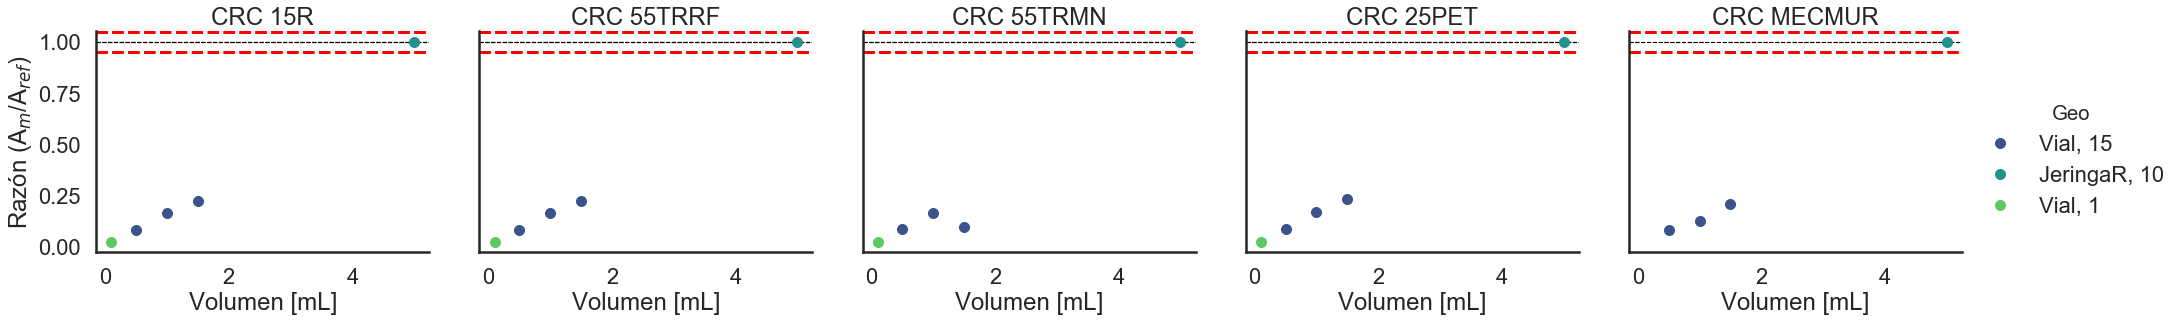

In [304]:
sns.set_context('poster')
sns.set_style('white')
g = sns.FacetGrid(data,col='Activ',hue="Geo",size=5,height=10,aspect=1.1,
                  palette='viridis',col_order=['15R','55TRRF','55TRMN','25PET','MECMUR'])
g.map(plt.errorbar, "Volumen","R","SDOM", marker="o",markersize=10,linewidth=0)

def vertical_mean_line_survived(x, **kwargs):
    plt.axhline(1.05, linestyle = '--', color = 'r')
    plt.axhline(0.95, linestyle = '--', color = 'r')
    plt.axhline(1.00, linestyle = '--', color = 'k',linewidth=1.1)

g.map(vertical_mean_line_survived, 'Volumen') 
#g.set_axis_labels("Volumen [mL]", "Razón (C$_m$/C$_{ref}$)")
g.set_axis_labels("Volumen [mL]", "Razón (A$_m$/A$_{ref}$)")
#g.set_title('Tecnecio')
g.set_titles(col_template="CRC {col_name}")
g.add_legend()
#g.savefig('RI.pdf')

/Users/Mila/anaconda/lib/python3.5/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


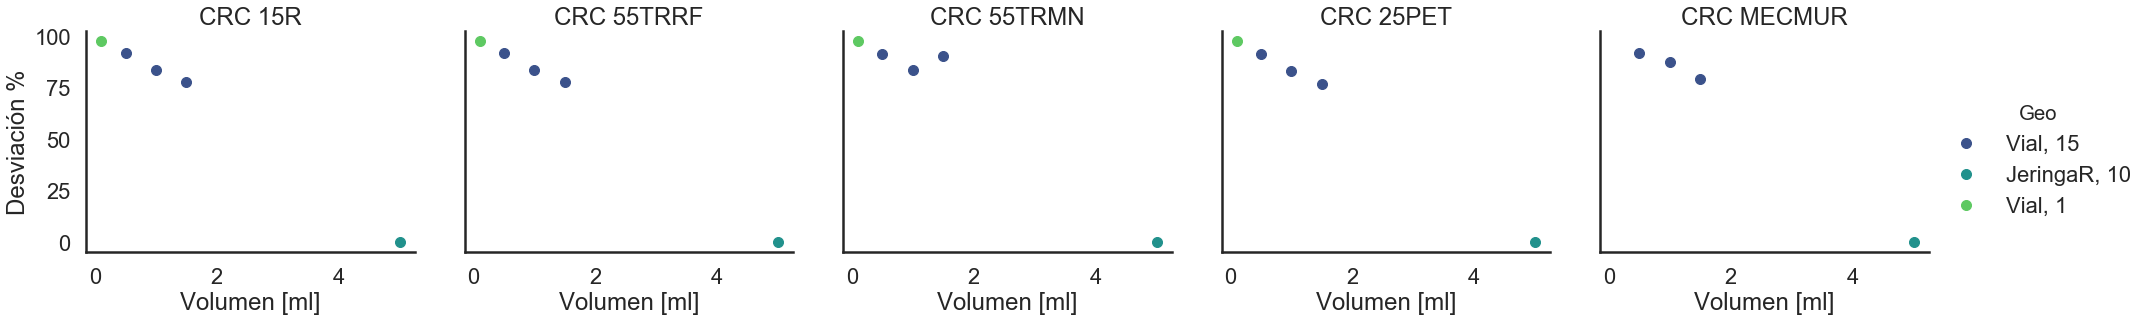

In [305]:
sns.set_context('poster')
sns.set_style('white')
g = sns.FacetGrid(data,col='Activ',hue="Geo",size=5,height=10,aspect=1.1,
                  palette='viridis',col_order=['15R','55TRRF','55TRMN','25PET','MECMUR'])
g.map(plt.errorbar, "Volumen","desvR","SDOM", marker="o",markersize=10,linewidth=0)
g.set_axis_labels("Volumen [ml]", "Desviación %")
#g.set_title('Tecnecio')
g.set_titles(col_template="CRC {col_name}")

g.add_legend()
#g.savefig('desvRI.pdf')

In [65]:
#### Porcentaje de Desviación 
#data['RV']=((data['CMean']-data['Pref'])*100)/data['Pref']

## Diferente Geometría, Diferente Volumen

#### Tomando Ajuste de Jeringa de 1 y de 3 x activímetro. Tc-99m

In [172]:
Ajus_J1 = []
for index, row in data.iterrows():
        c=(res1[res1.index==row['Activ']]['slope'].values.astype(float)[0]*row['Volumen'])+(res1[res1.index==row['Activ']]['intercept'].values.astype(float)[0])
        Ajus_J1.append(c)

In [173]:
Ajus_J3 = []
for index, row in data.iterrows():
        c=(res3[res3.index==row['Activ']]['slope'].values.astype(float)[0]*row['Volumen'])+(res3[res3.index==row['Activ']]['intercept'].values.astype(float)[0])
        Ajus_J3.append(c)

#### Tomando Ajuste de Jeringa de 50 y Vial de 15 x activímetro. Lu-177

In [246]:
Ajus_J50 = []
for index, row in data.iterrows():
        c=(res50[res50.index==row['Activ']]['slope'].values.astype(float)[0]*row['Volumen'])+(res50[res50.index==row['Activ']]['intercept'].values.astype(float)[0])
        Ajus_J50.append(c)

In [247]:
Ajus_V15 = []
for index, row in data.iterrows():
        c=(res15[res15.index==row['Activ']]['slope'].values.astype(float)[0]*row['Volumen'])+(res15[res15.index==row['Activ']]['intercept'].values.astype(float)[0])
        Ajus_V15.append(c)

#### Tomando Ajuste de Vial de 15 x activímetro. I-131

In [306]:
Ajus_V15 = []
for index, row in data.iterrows():
        c=(res15[res15.index==row['Activ']]['slope'].values.astype(float)[0]*row['Volumen'])+(res15[res15.index==row['Activ']]['intercept'].values.astype(float)[0])
        Ajus_V15.append(c)

In [307]:
AjusteG=data
#### Tecnecio 99m
#AjusteG['jeringa1']=Ajus_J1
#AjusteG['jeringa3']=Ajus_J3

#### Lutecio 177
#AjusteG['jeringa50']=Ajus_J50
#AjusteG['vial15']=Ajus_V15

#### Yodo 131
AjusteG['vial15']=Ajus_V15

In [308]:
#### Tecnecio 99m
#AjusteG['RJ1']=AjusteG['CMean']/AjusteG['jeringa1']
#AjusteG['RJ3']=AjusteG['CMean']/AjusteG['jeringa3']

#### Lutecio 177
#AjusteG['RJ50']=AjusteG['CMean']/AjusteG['jeringa50']
#AjusteG['RV15']=AjusteG['CMean']/AjusteG['vial15']

#### Yodo 131
AjusteG['RV15']=AjusteG['CMean']/AjusteG['vial15']

### Ajuste Polinomial

In [309]:
from sklearn.metrics import r2_score

#### Tomando Ajuste Lineal y Cuadratico x activímetro. Tc-99m

In [310]:
#### Funcion para Ajuste Polinomial 
def poly_fit(data,xcols,ycol):
    Y = data['CMean']
    X = data['Volumen']
    # Here we use a polynomial of the 2do order (square) 
    f = np.polyfit(X, Y, 2)
    p = np.poly1d(f)
    r_squared = r2_score(Y, p(X))
    return pd.Series({'square':f[0],'alauna':f[1],'inter':f[2],'R_square':r_squared})

#### Funcion para Ajuste Lineal

def unod_fit(data,xcols,ycol):
    Y = data['CMean']
    X = data[['Volumen']]
    # Lineal 
    lm.fit(X,Y)
    slope=lm.coef_
    intercept=lm.intercept_
    r_squared=lm.score(X, Y)
    return pd.Series({'slope':slope,'intercept':intercept,'R_square':r_squared})

In [311]:
#### Llamadas de la funcion para obtener datos de ajuste cuadrado
poli=data.groupby('Activ').apply(poly_fit, xcols='Volumen',ycol='CMean')
#### Llamadas de la funcion para obtener datos de ajuste lineal
lineal=data.groupby('Activ').apply(unod_fit, xcols='Volumen',ycol='CMean')

In [312]:
#poli
lineal

,R_square,intercept,slope
Activ,,,
15R,0.993379,-0.121645,[0.784498072529]
25PET,0.994781,-0.101111,[0.789652014139]
55TRMN,0.954484,-0.221284,[0.785489352796]
55TRRF,0.993423,-0.122535,[0.782015824839]
MECMUR,0.993387,-0.193763,[0.577840910413]


In [313]:
list_poli = []
list_lineal=[]
for index, row in data.iterrows():
    c=(poli[poli.index==row['Activ']]['square'].values.astype(float)[0]*(row['Volumen']**2))+(poli[poli.index==row['Activ']]['alauna'].values.astype(float)[0]*row['Volumen'])+(poli[poli.index==row['Activ']]['inter'].values.astype(float)[0])
    b=(lineal[lineal.index==row['Activ']]['slope'].values.astype(float)[0]*row['Volumen'])+(lineal[lineal.index==row['Activ']]['intercept'].values.astype(float)[0])
      
    list_poli.append(c)
    list_lineal.append(b)

In [314]:
#list_poli
#list_lineal
data['Asquare']=list_poli
data['Alineal']=list_lineal
data['Rsquare']=data['CMean']/list_poli
data['Rlineal']=data['CMean']/list_lineal

#### Desviaciones porcentuales

In [315]:
##########  Tc-99 m
#data['desvRJ1']=np.absolute(data['RJ1']-1)*100
#data['desvRJ3']=np.absolute(data['RJ3']-1)*100
########## Lu-177
#data['desvRJ50']=np.absolute(data['RJ50']-1)*100
#data['desvRV15']=np.absolute(data['RV15']-1)*100
########## I-131
data['desvRV15']=np.absolute(data['RV15']-1)*100


data['desvRlineal']=np.absolute(data['Rlineal']-1)*100
data['desvRsquare']=np.absolute(data['Rsquare']-1)*100

In [319]:
data['desvRsquare'].min()

0.013186014399357848

/Users/Mila/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/Mila/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


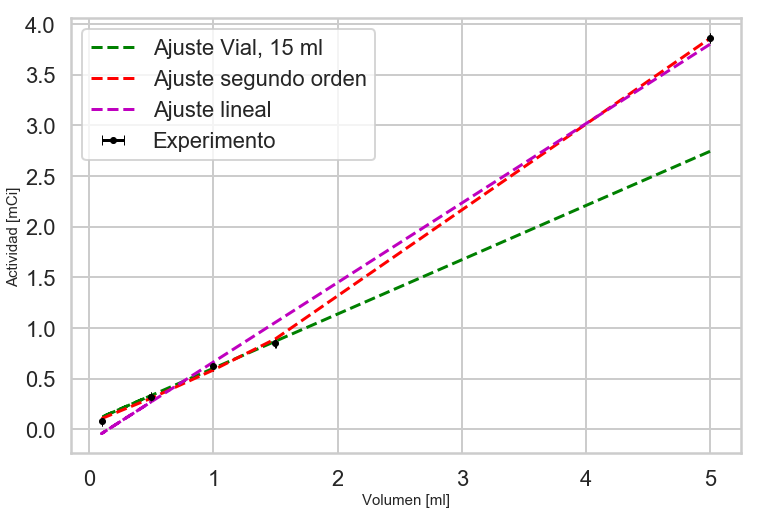

In [221]:
sns.set_style('whitegrid')
#sns.set_context('poster')
plt.figure(figsize=(12,8))
plt.errorbar(AjusteG[(AjusteG.Activ == '15R')]['Volumen'],
             AjusteG[(AjusteG.Activ == '15R')]['CMean'], 
             xerr=AjusteG[(AjusteG.Activ == '15R')]['SDOM'],
             fmt='.k',label='Experimento',capsize=5)
#plt.plot(AjusteG[(AjusteG.Activ == '15R')]['Volumen'],
         #AjusteG[(AjusteG.Activ == '15R')]['jeringa1'],'--b',label='Ajuste Jeringa, 1 mL')
         #AjusteG[(AjusteG.Activ == '15R')]['jeringa50'],'--b',label='Ajuste Jeringa, 50 ml')
plt.plot(AjusteG[(AjusteG.Activ == '15R')]['Volumen'],
         #AjusteG[(AjusteG.Activ == '15R')]['jeringa3'],'--g',label='Ajuste Jeringa, 3 mL')
         AjusteG[(AjusteG.Activ == '15R')]['vial15'],'--g',label='Ajuste Vial, 15 ml')
plt.plot(data.sort_values(by=['Volumen'])[(data.Activ == '15R')]['Volumen'],
         data.sort_values(by=['Volumen'])[(data.Activ == '15R')]['Asquare'],'--r',label='Ajuste segundo orden')
plt.plot(data[(data.Activ == '15R')]['Volumen'],
         data[(data.Activ == '15R')]['Alineal'],'--m',label='Ajuste lineal')
plt.xlabel(r'Volumen [ml]',size=15)
plt.ylabel(r'Actividad [mCi]',size=15)
plt.legend()
plt.savefig('detajusteI.pdf')

/Users/Mila/anaconda/lib/python3.5/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x936 with 0 Axes>

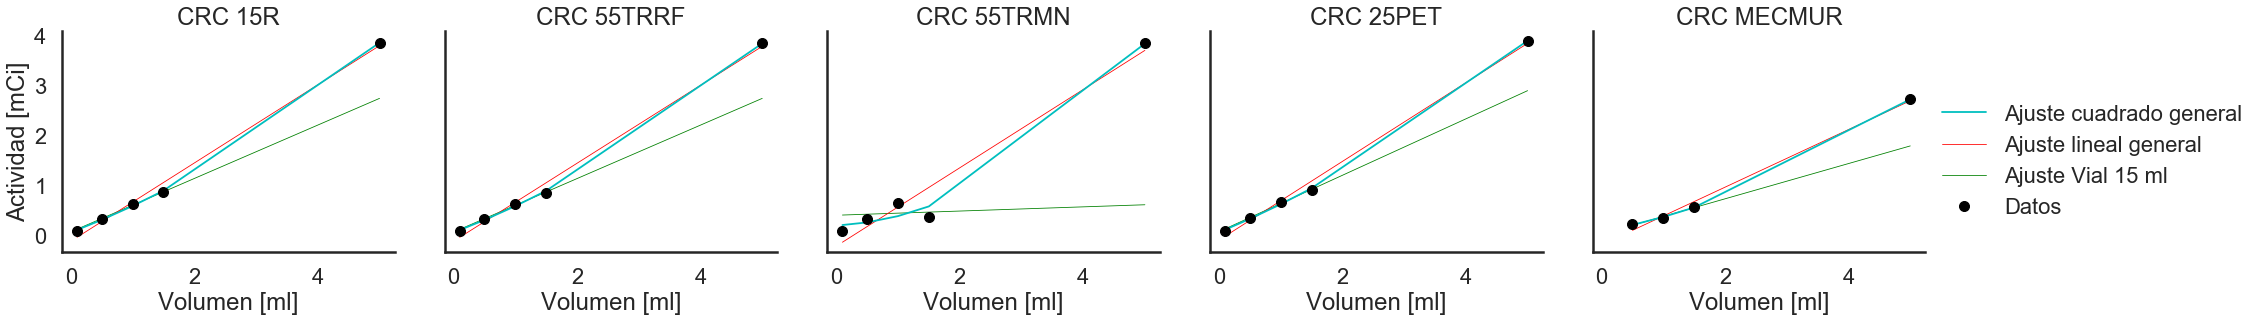

In [222]:
sns.set_context('poster')
sns.set_style('white')
plt.figure(figsize=(15,13))
g = sns.FacetGrid(data.sort_values(by=['Volumen']),col='Activ',size=5,height=10,aspect=1.1,
                  col_order=['15R','55TRRF','55TRMN','25PET','MECMUR'])

g.map(plt.errorbar, "Volumen","CMean","SDOM", marker="o",markersize=10,linewidth=0,color='k',label='Datos')

###### Tecnecio 99m
#g.map_dataframe(sns.lineplot, "Volumen","jeringa1",markersize=10,linewidth=0.8,color='b',label='Ajuste Jeringa 1 ml')
#g.map_dataframe(sns.lineplot, "Volumen","jeringa3",markersize=10,linewidth=0.8,color='g',label='Ajuste Jeringa 3 ml')

###### Lutecio 177
#g.map_dataframe(sns.lineplot, "Volumen","jeringa50",markersize=10,linewidth=0.8,color='b',label='Ajuste Jeringa 50 ml')
#g.map_dataframe(sns.lineplot, "Volumen","vial15",markersize=10,linewidth=0.8,color='g',label='Ajuste Vial 15 ml')


###### Yodo 131
g.map_dataframe(sns.lineplot, "Volumen","vial15",markersize=10,linewidth=0.8,color='g',label='Ajuste Vial 15 ml')



g.map_dataframe(sns.lineplot, "Volumen","Alineal",markersize=10,linewidth=0.8,color='r',label='Ajuste lineal general')   
g.map_dataframe(sns.lineplot, "Volumen","Asquare",markersize=10,linewidth=1.8,color='c',label='Ajuste cuadrado general')     
    
#g.map(vertical_mean_line_survived, 'Volumen') 
g.set_axis_labels("Volumen [ml]", "Actividad [mCi]")
#g.set_title('Tecnecio')
#g.set(ylim=(0.93, 1.07))
g.set_titles(col_template="CRC {col_name}")

g.add_legend()
g.savefig('ajusgavI.pdf')

#### Razón entre actividades medidas y de ajuste GENERAL

/Users/Mila/anaconda/lib/python3.5/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


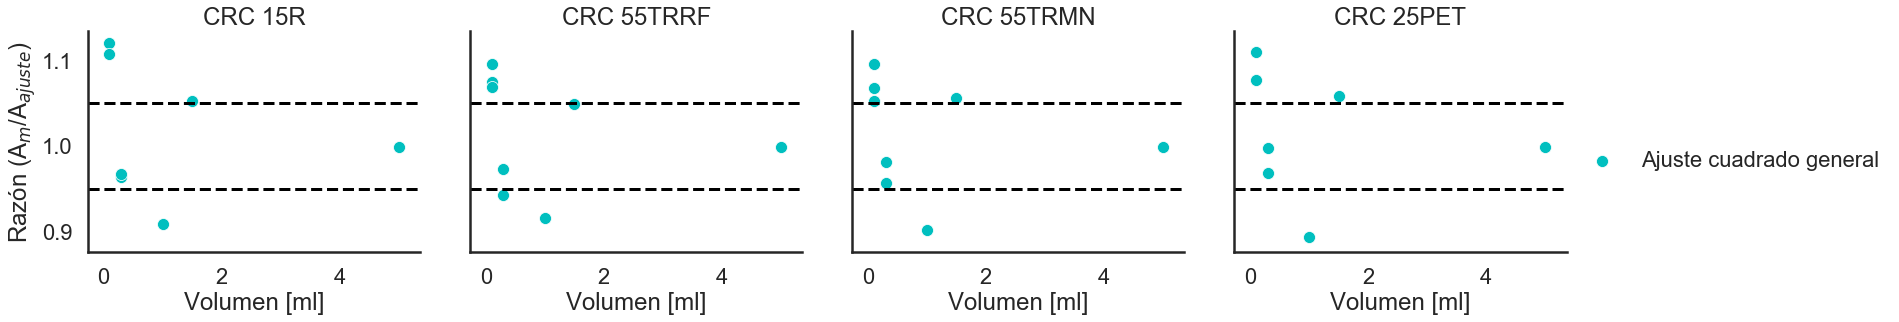

In [192]:
sns.set_context('poster')
sns.set_style('white')
g = sns.FacetGrid(AjusteG.sort_values(by=['Volumen']),col='Activ',size=5,height=10,aspect=1.1,
                  col_order=['15R','55TRRF','55TRMN','25PET'])

####### Tecnecio 99 m
#g.map_dataframe(sns.scatterplot, "Volumen","RJ1",color='b',label='Ajuste Jeringa 1 ml')
#g.map_dataframe(sns.scatterplot, "Volumen","RJ3",color='g',label='Ajuste Jeringa 3 ml')

####### Lutecio 177
#g.map_dataframe(sns.scatterplot, "Volumen","RJ50",color='b',label='Ajuste Jeringa 50 ml')
#g.map_dataframe(sns.scatterplot, "Volumen","RV15",color='g',label='Ajuste Vial 15 ml')

####### Yodo 131
#g.map_dataframe(sns.scatterplot, "Volumen","RV15",color='g',label='Ajuste Vial 15 ml')



#g.map_dataframe(sns.scatterplot, "Volumen","Rlineal",color='r',label='Ajuste lineal general')   
g.map_dataframe(sns.scatterplot, "Volumen","Rsquare",color='c',label='Ajuste cuadrado general')    
    
    
def vertical_mean_line_survived(x, **kwargs):
    plt.axhline(1.05, linestyle = '--', color = 'k')
    plt.axhline(0.95, linestyle = '--', color = 'k')

g.map(vertical_mean_line_survived, 'Volumen') 
g.set_axis_labels("Volumen [ml]", "Razón (A$_m$/A$_{ajuste}$)")  

#g.set_title('Tecnecio')
#g.set(ylim=(0.93, 1.07))
g.set_titles(col_template="CRC {col_name}")

g.add_legend()
g.savefig('RajustesGTC.pdf')

In [134]:
#data['jeringa50']

#### Desviaciones GENERALES

/Users/Mila/anaconda/lib/python3.5/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


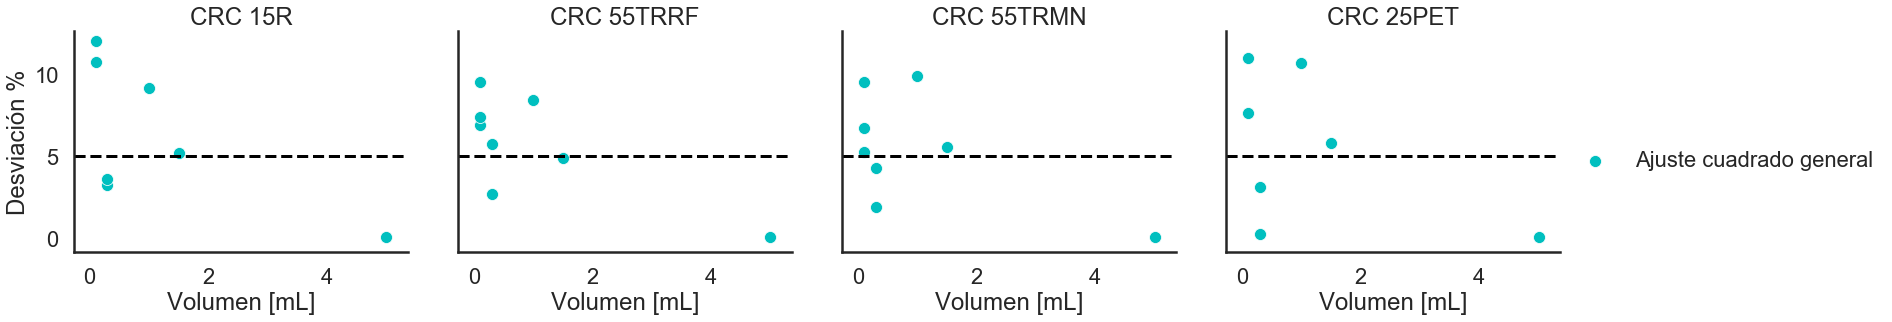

In [193]:
sns.set_context('poster')
sns.set_style('white')
g = sns.FacetGrid(data,col='Activ',size=5,height=10,aspect=1.1,
                  palette='viridis',col_order=['15R','55TRRF','55TRMN','25PET'])

#### Tecnecio 99m
#g.map_dataframe(sns.scatterplot, "Volumen","desvRJ1",color='b',label='Ajuste Jeringa 1 ml')
#g.map_dataframe(sns.scatterplot, "Volumen","desvRJ3",color='g',label='Ajuste Jeringa 3 ml')

#### Lutecio 177
#g.map_dataframe(sns.scatterplot, "Volumen","desvRJ50",color='b',label='Ajuste Jeringa 50 ml')
#g.map_dataframe(sns.scatterplot, "Volumen","desvRV15",color='g',label='Ajuste Vial 15 ml')

#g.map_dataframe(sns.scatterplot, "Volumen","desvRlineal",color='r',label='Ajuste lineal general')   
g.map_dataframe(sns.scatterplot, "Volumen","desvRsquare",color='c',label='Ajuste cuadrado general') 

def vertical_mean_line_survived(x, **kwargs):
    plt.axhline(5, linestyle = '--', color = 'k')

g.map(vertical_mean_line_survived, 'Volumen') 

g.set_axis_labels("Volumen [mL]", "Desviación %")
#g.set_title('Tecnecio')
g.set_titles(col_template="CRC {col_name}")

g.add_legend()
g.savefig('desvRajusteGTC.pdf')

In [120]:
#data

In [75]:
### Elegir activimetro
is_Activ =  data['Activ']=='15R'
data=data[is_Activ]

In [123]:
#elegir

### AJUSTES

In [218]:
###### Tc-99 m 
listado= elegir['Geo']=='Jeringa, 1'
#listado= ((elegir['Geo']=='Jeringa, 1') | (elegir['Geo']=='JeringaR, 10'))
#listado= ((data['Geo']=='Jeringa, 1') | (data['Geo']=='Jeringa, 3'))
#limpio=data['Contenedor']=='Jeringa'
#data=data[limpio]
#listado= data['Geo']=='Jeringa, 1'
ajuste = elegir[listado]



In [219]:
ajuste

,RN,Activ,Contenedor,Capacidad,Volumen,Hora,Mean,STD,Var,SDOM,porvol,Geo,timeE,CMean
39,Tc,15R,Jeringa,1,1.0,11/12/2020T15:32,1.080,0.0032,0.296296,0.002024,100.0,"Jeringa, 1",108.0,1.329305
40,Tc,15R,Jeringa,1,0.3,11/12/2020T15:35,0.455,0.0020,0.439560,0.001265,30.0,"Jeringa, 1",111.0,0.563271
41,Tc,15R,Jeringa,1,0.1,11/12/2020T15:36,0.287,0.0007,0.243902,0.000443,10.0,"Jeringa, 1",112.0,0.355978


#### Ajuste con las patas

In [220]:
from sklearn.linear_model import LinearRegression
#Create the linear regression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [225]:
X = ajuste[['Volumen']]
Y = ajuste['CMean'] 


In [226]:
lm.fit(X,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [227]:
# Slope 
bl=lm.coef_
bl

array([ 1.08483256])

In [224]:
# Intercept
al=lm.intercept_
al

0.24326289693636072

In [195]:
##### calcular segun ajuste con las patas donde deberia estar cada medida
elegir['ME']=al+(bl*elegir['Volumen'])
ajuste['ME']=al+(bl*ajuste['Volumen'])


/Users/Mila/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Mila/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


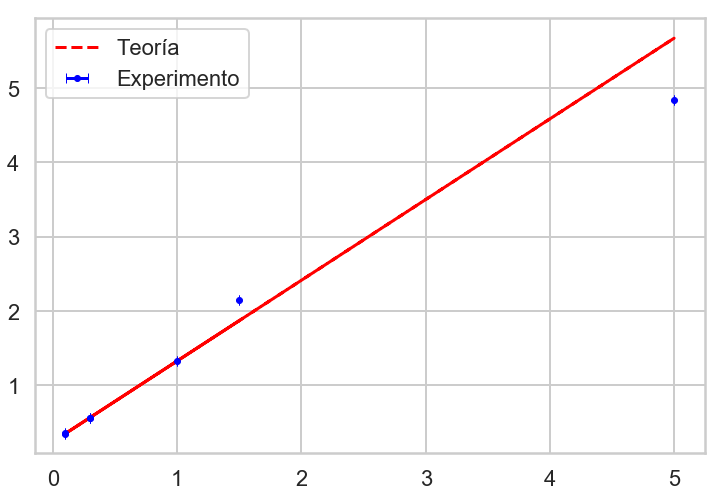

In [196]:
sns.set_style('whitegrid')
sns.set_context('poster')
plt.figure(figsize=(12,8))
plt.errorbar(elegir['Volumen'],elegir['CMean'], xerr=elegir['SDOM'],fmt='.b',label='Experimento',capsize=5)
plt.plot(elegir['Volumen'],(al+(bl*elegir['Volumen'])),'--r',label='Teoría')
#plt.xlabel(r'Actividad Calculada [MBq]',size=15)
#plt.ylabel(r'Actividad Medida [MBq]',size=15)
plt.legend()

In [205]:
##### calcular segun ajuste con las patas donde deberia estar cada medida
#data['ME']=al+(bl*data['Volumen'])
data['CMean']


4     0.355000
5     0.344322
6     0.551171
7     2.053559
8     0.567590
9     4.711937
10    1.245728
35    2.145544
36    0.565376
37    0.351894
38    4.840183
39    1.329305
40    0.563271
41    0.355978
54    2.186101
55    4.915842
56    0.352896
57    0.585839
58    1.371822
59    0.567558
60    0.354566
61    0.361626
74    0.561687
75    0.348849
76    2.103986
77    0.575728
78    0.353749
79    1.291917
80    4.838586
81    0.363124
Name: CMean, dtype: float64

In [166]:
###### RAZONES: Actividad medida y Actividad de Referencia (Jeringa de 10,Volumen 5 mL)
##### A_m/A_ref
data['razon']=data['CMean']/data['ME']
##### Concentracon de actividad
#tabaa['Rcona']=(data['CMean']*5.0)/(list_refcon*data['Volumen'])
###### DESVIACIONES: Actividad medida y Actividad de Referencia (Jeringa de 10,Volumen 5 mL)
##### A_m/A_ref
data['desv']=np.absolute(data['razon']-1)*100
##### Concentracon de actividad
#tabaa['desvRcona']=np.absolute(tabaa['Rcona']-1)*100

In [199]:
#data
ajuste['razon']=ajuste['CMean']/ajuste['ME']
elegir['razon']=elegir['CMean']/elegir['ME']

/Users/Mila/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Mila/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/Users/Mila/anaconda/lib/python3.5/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


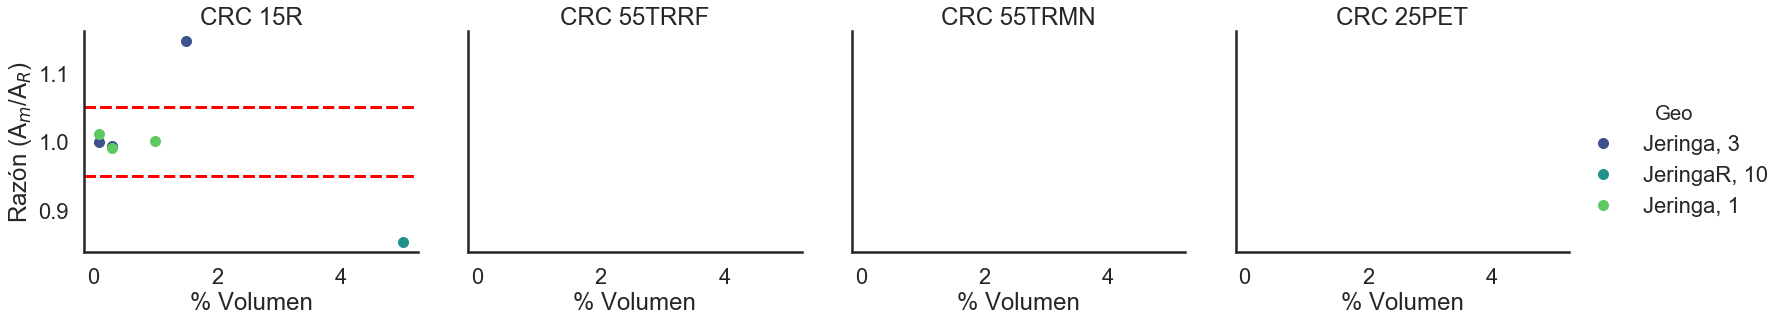

In [200]:
sns.set_context('poster')
sns.set_style('white')
g = sns.FacetGrid(elegir,col='Activ',hue="Geo",size=5,height=10,aspect=1.1,
                  palette='viridis',col_order=['15R','55TRRF','55TRMN','25PET'])
g.map(plt.errorbar, "Volumen","razon","SDOM", marker="o",markersize=10,linewidth=0)

def vertical_mean_line_survived(x, **kwargs):
    plt.axhline(1.05, linestyle = '--', color = 'r')
    plt.axhline(0.95, linestyle = '--', color = 'r')

g.map(vertical_mean_line_survived, 'Volumen') 
g.set_axis_labels("% Volumen", "Razón (A$_m$/A$_{R}$)")
#g.set_title('Tecnecio')
g.set_titles(col_template="CRC {col_name}")
g.add_legend()
#g.savefig('RajustepvolTc.pdf')

/Users/Mila/anaconda/lib/python3.5/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


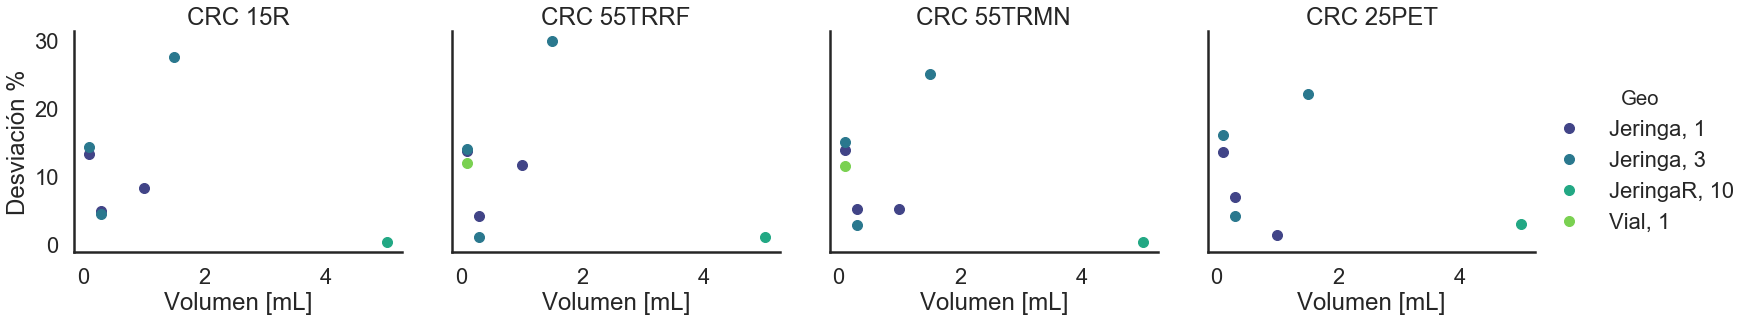

In [169]:
sns.set_context('poster')
sns.set_style('white')
g = sns.FacetGrid(data,col='Activ',hue="Geo",size=5,height=10,aspect=1.1,
                  palette='viridis',col_order=['15R','55TRRF','55TRMN','25PET'])
g.map(plt.errorbar, "Volumen","desv","SDOM", marker="o",markersize=10,linewidth=0)
g.set_axis_labels("Volumen [mL]", "Desviación %")
#g.set_title('Tecnecio')
g.set_titles(col_template="CRC {col_name}")

g.add_legend()
g.savefig('desvRajusteTc.pdf')

### Comparación entre geometría de referencia y geometría problema

##### Para comparar la actividad de referencia en la geometría de referencia 
$$A_{cref}=\frac{A_{ref}}{V_{ref}}\times V_{p}$$

In [562]:
#### Concentración de actividad en la geometría de referencia
REF=data.loc[c]['CMean']/data.loc[c]['Volumen']
REF

0.96771725567307865

###### Actividad de Referencia comparable con Geometría problema

In [368]:
data['Pref']=REF*data['Volumen']

Comparación entre geometrías a partir de: 

$$A_{mVp}/A_{cref} $$

Porcentaje de desviación: 

$$ R_v=\frac{A_{mVp}-A_{cref}}{A_{cref}} \times 100 \% $$

In [369]:
#### Razón: Actividad problema de Referencia a Actividad medida en geometría problema
data['razon']=data['CMean']/data['Pref']

Text(0,0.5,'Actividad medida/Actividad Referencia')

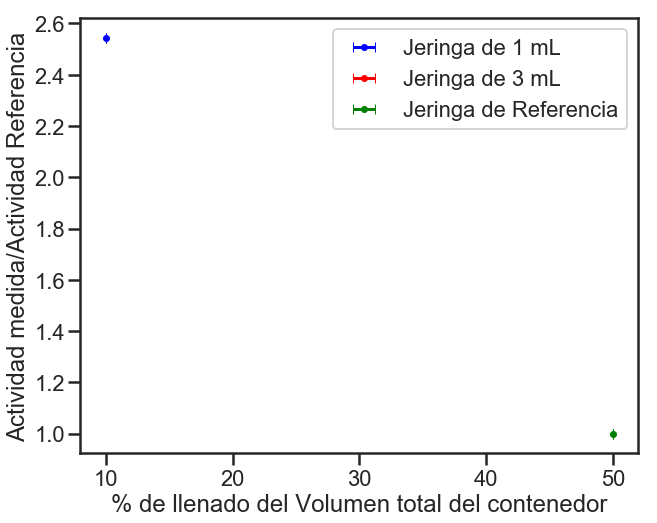

In [370]:
#### Grafico de Razon de Actividad medida/Actividad de Referencia vs Volumen [mL]
plt.figure(figsize=(10,8))
plt.errorbar((data[data.Capacidad == 1]['porvol']),data[data.Capacidad == 1]['razon'],xerr=data[data.Capacidad == 1]['SDOM'],fmt='.b',label='Jeringa de 1 mL',capsize=5)
plt.errorbar((data[data.Capacidad == 3]['porvol']),data[data.Capacidad == 3]['razon'],xerr=data[data.Capacidad == 3]['SDOM'],fmt='.r',label='Jeringa de 3 mL',capsize=5)
plt.errorbar((data[data.Capacidad == 10]['porvol']),data[data.Capacidad == 10]['razon'],xerr=data[data.Capacidad == 10]['SDOM'],fmt='.g',label='Jeringa de Referencia',capsize=5)
plt.legend()
plt.xlabel(r'% de llenado del Volumen total del contenedor')
#plt.xlabel(r'Volumen [mL]')
plt.ylabel('Actividad medida/Actividad Referencia')
#plt.title('CRC 55TR RF Tc-99m')
#plt.savefig('geo15rRVTc.pdf')

In [371]:
data['brazon']=data['CMean']/data.loc[c]['CMean']

Text(0.5,1,'CRC 15R Tc-99m')

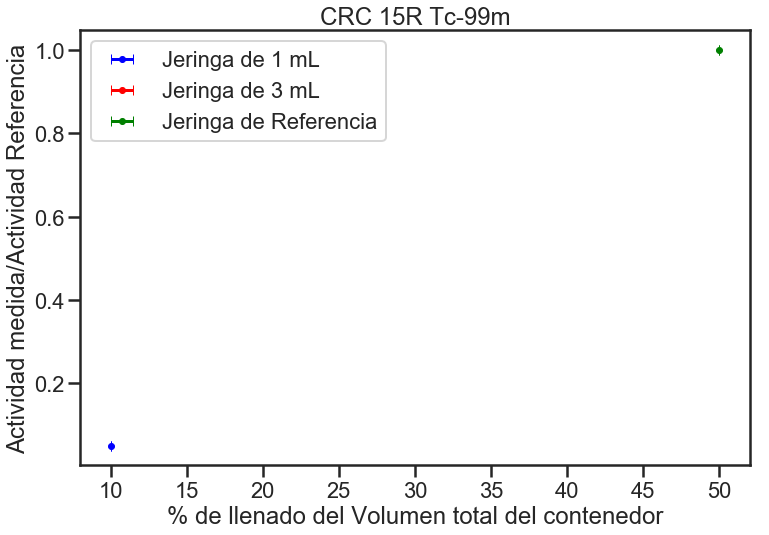

In [372]:
#### Grafico de Razon de Actividad medida/Actividad de Referencia vs % llenado [mL]
plt.figure(figsize=(12,8))
plt.errorbar((data[data.Capacidad == 1]['porvol']),data[data.Capacidad == 1]['brazon'],xerr=data[data.Capacidad == 1]['SDOM'],fmt='.b',label='Jeringa de 1 mL',capsize=5)
plt.errorbar((data[data.Capacidad == 3]['porvol']),data[data.Capacidad == 3]['brazon'],xerr=data[data.Capacidad == 3]['SDOM'],fmt='.r',label='Jeringa de 3 mL',capsize=5)
plt.errorbar((data[data.Capacidad == 10]['porvol']),data[data.Capacidad == 10]['brazon'],xerr=data[data.Capacidad == 10]['SDOM'],fmt='.g',label='Jeringa de Referencia',capsize=5)
plt.legend()
plt.xlabel(r'% de llenado del Volumen total del contenedor')
#plt.xlabel(r'Volumen [mL]')
plt.ylabel('Actividad medida/Actividad Referencia')
plt.title('CRC 15R Tc-99m')
#plt.savefig('geo15rRVTc.pdf')

In [373]:
#### Porcentaje de Desviación 
data['RV']=(data['CMean']-data['Pref'])/data['Pref']

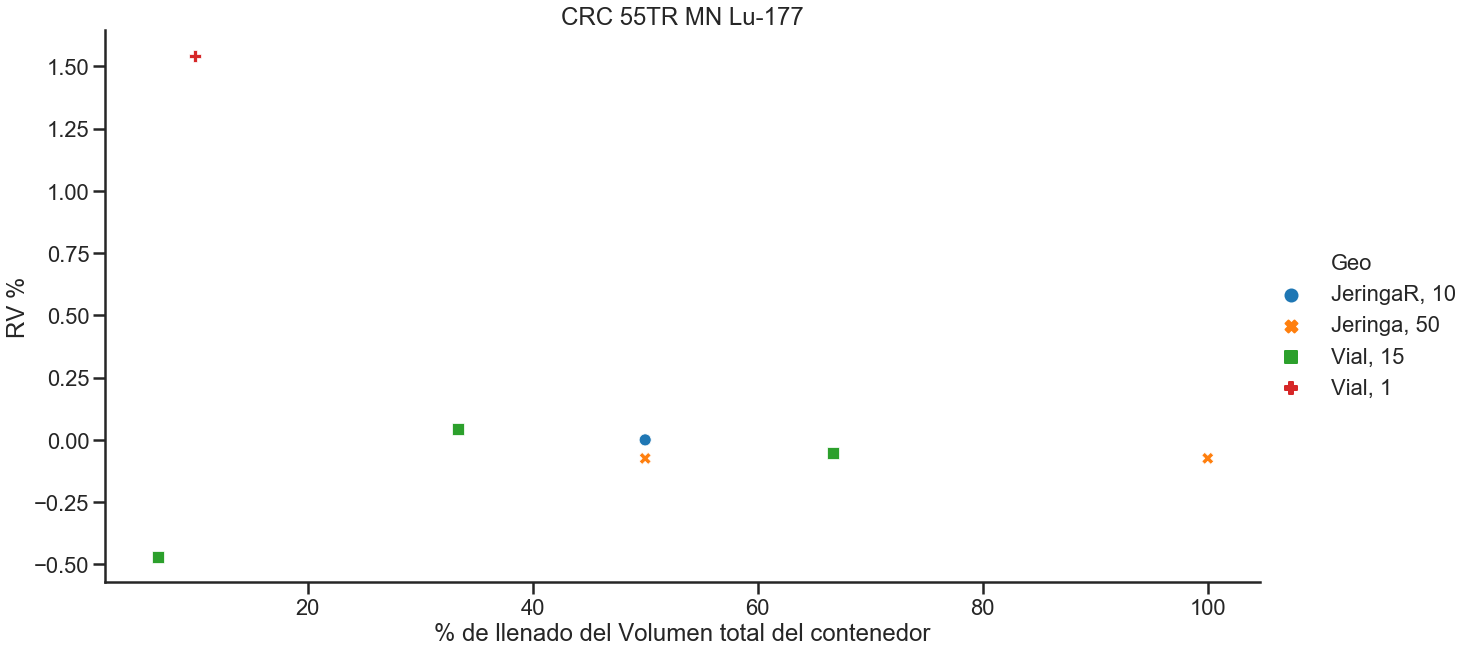

In [374]:
sns.relplot(data=data, x="porvol", y="RV",hue="Geo",style="Geo", height=9, aspect=2)
plt.ylabel('RV %')
plt.xlabel(r'% de llenado del Volumen total del contenedor')
plt.title('CRC 55TR MN Lu-177')
plt.savefig('geo55TRMNRVLu.pdf')

35     47.759163
36     94.681247
37    263.513452
38      0.000000
39     37.319663
40     93.956658
41    267.732183
Name: RV, dtype: float64

### Razon entre Concentracion de Actividad medida y Concentracion de Actividad de referencia

In [180]:
#### Concentracion de Actividad en la geometria de referencia
cREF=dTc.loc[c]['Concentra']
cREF

0.96803661212837411

In [181]:
### Tc-99m ###
dTc['crazon']=dTc['Concentra']/cREF
### I-131 ###
#dI['crazon']=dI['Concentra']/cREF
### Lu-177 ###
#dLu['crazon']=dLu['Concentra']/cREF

Text(0.5,1,'CRC 15R Tc-99m')

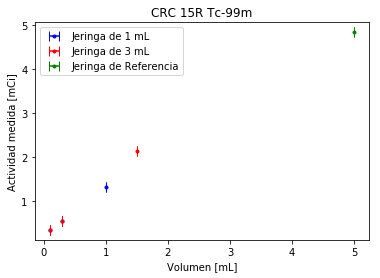

In [182]:
#### Grafico de Actividad medida [mCi] vs Volumen [mL]
plt.errorbar((dTc[dTc.Capacidad == 1]['Volumen']),dTc[dTc.Capacidad == 1]['CMean'],xerr=dTc[dTc.Capacidad == 1]['SDOM'],fmt='.b',label='Jeringa de 1 mL',capsize=5)
plt.errorbar((dTc[dTc.Capacidad == 3]['Volumen']),dTc[dTc.Capacidad == 3]['CMean'],xerr=dTc[dTc.Capacidad == 3]['SDOM'],fmt='.r',label='Jeringa de 3 mL',capsize=5)

plt.errorbar((dTc[dTc.Capacidad == 10]['Volumen']),dTc[dTc.Capacidad == 10]['CMean'],xerr=dTc[dTc.Capacidad == 10]['SDOM'],fmt='.g',label='Jeringa de Referencia',capsize=5)
plt.legend()
plt.xlabel(r'Volumen [mL]')
plt.ylabel('Actividad medida [mCi]')
plt.title('CRC 15R Tc-99m')
#plt.savefig('geo15rAVTc.pdf')

Text(0.5,1,'CRC 15R Tc-99m')

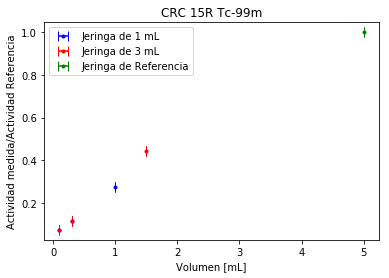

In [183]:
#### Grafico de Razon de Actividad medida/Actividad de Referencia vs Volumen [mL]
plt.errorbar((dTc[dTc.Capacidad == 1]['Volumen']),dTc[dTc.Capacidad == 1]['razon'],xerr=dTc[dTc.Capacidad == 1]['SDOM'],fmt='.b',label='Jeringa de 1 mL',capsize=5)
plt.errorbar((dTc[dTc.Capacidad == 3]['Volumen']),dTc[dTc.Capacidad == 3]['razon'],xerr=dTc[dTc.Capacidad == 3]['SDOM'],fmt='.r',label='Jeringa de 3 mL',capsize=5)

plt.errorbar((dTc[dTc.Capacidad == 10]['Volumen']),dTc[dTc.Capacidad == 10]['razon'],xerr=dTc[dTc.Capacidad == 10]['SDOM'],fmt='.g',label='Jeringa de Referencia',capsize=5)
plt.legend()
plt.xlabel(r'Volumen [mL]')
plt.ylabel('Actividad medida/Actividad Referencia')
plt.title('CRC 15R Tc-99m')
#plt.savefig('geo15rRVTc.pdf')

In [184]:
#dTc['crazon']

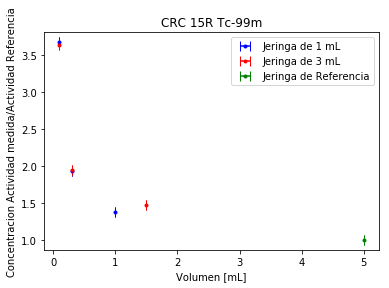

In [185]:
#### Grafico de Razon de Concentracion de Actividad medida/Concetracion de Actividad de Referencia vs Volumen 
plt.errorbar((dTc[dTc.Capacidad == 1]['Volumen']),dTc[dTc.Capacidad == 1]['crazon'],xerr=dTc[dTc.Capacidad == 1]['SDOM'],fmt='.b',label='Jeringa de 1 mL',capsize=5)
plt.errorbar((dTc[dTc.Capacidad == 3]['Volumen']),dTc[dTc.Capacidad == 3]['crazon'],xerr=dTc[dTc.Capacidad == 3]['SDOM'],fmt='.r',label='Jeringa de 3 mL',capsize=5)

plt.errorbar((dTc[dTc.Capacidad == 10]['Volumen']),dTc[dTc.Capacidad == 10]['crazon'],xerr=dTc[dTc.Capacidad == 10]['SDOM'],fmt='.g',label='Jeringa de Referencia',capsize=5)
plt.legend()
plt.xlabel(r'Volumen [mL]')
plt.ylabel('Concentracion Actividad medida/Actividad Referencia')
plt.title('CRC 15R Tc-99m')
plt.savefig('geo15rcRVTc.pdf')

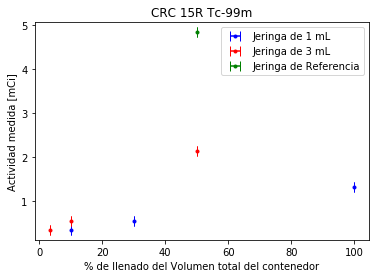

In [187]:
#### Grafico de Actividad medida [mCi] vs Porcentaje Volumen 
plt.errorbar((dTc[dTc.Capacidad == 1]['porvol']),dTc[dTc.Capacidad == 1]['CMean'],xerr=dTc[dTc.Capacidad == 1]['SDOM'],fmt='.b',label='Jeringa de 1 mL',capsize=5)
plt.errorbar((dTc[dTc.Capacidad == 3]['porvol']),dTc[dTc.Capacidad == 3]['CMean'],xerr=dTc[dTc.Capacidad == 3]['SDOM'],fmt='.r',label='Jeringa de 3 mL',capsize=5)

plt.errorbar((dTc[dTc.Capacidad == 10]['porvol']),dTc[dTc.Capacidad == 10]['CMean'],xerr=dTc[dTc.Capacidad == 10]['SDOM'],fmt='.g',label='Jeringa de Referencia',capsize=5)
plt.legend()
plt.xlabel(r'% de llenado del Volumen total del contenedor')
plt.ylabel('Actividad medida [mCi]')
plt.title('CRC 15R Tc-99m')
plt.savefig('geo15rAPVTc.pdf')

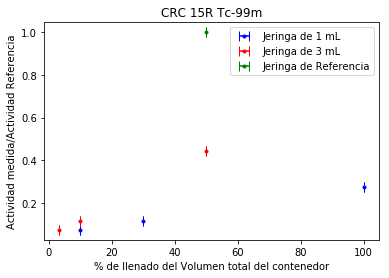

In [188]:
#### Grafico de Actividad medida [mCi] vs Porcentaje Volumen 
plt.errorbar((dTc[dTc.Capacidad == 1]['porvol']),dTc[dTc.Capacidad == 1]['razon'],xerr=dTc[dTc.Capacidad == 1]['SDOM'],fmt='.b',label='Jeringa de 1 mL',capsize=5)
plt.errorbar((dTc[dTc.Capacidad == 3]['porvol']),dTc[dTc.Capacidad == 3]['razon'],xerr=dTc[dTc.Capacidad == 3]['SDOM'],fmt='.r',label='Jeringa de 3 mL',capsize=5)

plt.errorbar((dTc[dTc.Capacidad == 10]['porvol']),dTc[dTc.Capacidad == 10]['razon'],xerr=dTc[dTc.Capacidad == 10]['SDOM'],fmt='.g',label='Jeringa de Referencia',capsize=5)
plt.legend()
plt.xlabel(r'% de llenado del Volumen total del contenedor')
plt.ylabel('Actividad medida/Actividad Referencia')
plt.title('CRC 15R Tc-99m')
plt.savefig('geo15rRPVTc.pdf')

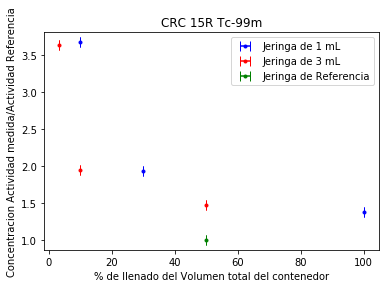

In [189]:
#### Grafico de Razon de Concentracion de Actividad medida/Concetracion de Actividad de Referencia vs Porcentaje Volumen [mL]
plt.errorbar((dTc[dTc.Capacidad == 1]['porvol']),dTc[dTc.Capacidad == 1]['crazon'],xerr=dTc[dTc.Capacidad == 1]['SDOM'],fmt='.b',label='Jeringa de 1 mL',capsize=5)
plt.errorbar((dTc[dTc.Capacidad == 3]['porvol']),dTc[dTc.Capacidad == 3]['crazon'],xerr=dTc[dTc.Capacidad == 3]['SDOM'],fmt='.r',label='Jeringa de 3 mL',capsize=5)

plt.errorbar((dTc[dTc.Capacidad == 10]['porvol']),dTc[dTc.Capacidad == 10]['crazon'],xerr=dTc[dTc.Capacidad == 10]['SDOM'],fmt='.g',label='Jeringa de Referencia',capsize=5)
plt.legend()
plt.xlabel(r'% de llenado del Volumen total del contenedor')
plt.ylabel('Concentracion Actividad medida/Actividad Referencia')
plt.title('CRC 15R Tc-99m')
plt.savefig('geo15rcRPVTc.pdf')